<h1 align = "center" > Hearth Attack Analysis And Prediction Update </h1>

### Table Content
1. [Introduction](#1)
    * 1.1 [Examining The Project Topic](#2)
    * 1.2 [Recognizing Variables in The Dataset](#3)
2. [First Organization](#4)
    * 2.1 [Required Python Libraries](#5)
        * 2.1.1 [Basic Libraries](#6)
    * 2.2 [Loading The Dataset](#7)
    * 2.3 [Initial Analysis On The Dataset](#8)
        * 2.3.1 [Analysis Outputs(1)](#9)
3. [Preparation for Exploratory Data Analysis(EDA)](#10)
    * 3.1 [Examining Missing Values](#11)
    * 3.2 [Examining Unique Values](#12)
        * 3.2.1 [Analysis Outputs(2)](#13)
    * 3.3 [Separating variables(Numeric or Categorical)](#14)
    * 3.4 [Examining Statistics of Variables](#18)
        * 3.4.1 [Analysis Output(3)](#19)
4. [Exploratory Data Analysis(EDA)](#15)
     * 4.1 [Uni-Variate Analysis](#16)
         * 4.1.1 [Numerical Variables(Analysis With Distplot)](#17)
             * 4.1.1.1 [Analysis Output(4)](#20)
         * 4.1.2 [Categorical Variable(Analysis with <b> Pie Chart</b>)](#21)
             * 4.1.2.1 [Analysis Output(5)](#22) 
             * 4.1.2.2 [Examining The Missing Data According to The Analysis Result](#23)
     * 4.2 [Bi-Variate Analysis](#24)
         * 4.2.1 [Numerical variables -Target variable(Analysis with FaceGrid)](#25)
         * 4.2.2 [Categorical Variables - Target variable(Analysis with Count Plot)](#26)
         * 4.2.3 [Examining Numerical Variables Among Themselves(Analysis with Pair Plot)](#27)
         * 4.2.4 [Feature Scaling with The RebustScaler Method](#28)
         * 4.2.5 [Creating a New DataFrame Using the Melt() Function](#29)
         * 4.2.6 [Numerical Variables - Categorical Variables()Analysis with <b>SwarmPlot</b>](#30)
         * 4.2.7 [Numerical Variables - Categorical Variables()Analysis with <b>BoxPlot</b>](#31)
         * 4.2.8 [Relationship Between all Variables(Analysis With Heatmap)](#32)
5. [Preparing For Modeling](#33)
    * 5.1 [Droping Columns with Low Correlatin](#34)
    * 5.2 [Strugling Outliers](#35)
        * 5.2.1 [Visualizing Outliers](#36)
        * 5.2.2 [Dealing With Outliers](#37)
            * 5.2.2.1 [<b>trtbps Variable</b>](#38)
            * 5.2.2.2 [<b>thalach Variable</b>](#39)
            * 5.2.2.3 [<b>oldpeak Variable</b>](#40)
    * 5.3 [Determining Distributions of Numeric Variables](#41)
    * 5.4 [Transformation Operation on Unsymmetrical Data](#42)
    * 5.5 [Applying One Hot Encoding Method to Categorical Variables](#43)
    * 5.6 [Feature Scaling with the RobustScaler Method For Machine Learning Algorithms](#44)
    * 5.7 [Separating Data into Test and Training set](#45)
* 6 [Modelling](#46)
    * 6.1 [Logistic Regression Algorithm](#47)
        * 6.1.1 [Cross Validation](#48)
        * 6.1.2 [Roc Curve and Area Under Curve(AUC)](#49)
        * 6.1.3 [Hyperparameter Optimization(with GridSearchCV)](#50)
   * 6.2 [Decision Tree Algorithm](#51)
   * 6.3 [Support Vector Machine Algorithm](#52)
   * 6.4 [Random Forest Algorithm](#53)
       * 6.4.1 [Hyper-parameter Optimization(with <b>GridSearchCV</b>)](#54)
* 7. [Project Conclusion](#55)

### 1. Introduction <a id =1></a>

#### 1.1 Examining the Project Topic <a id = 2></a>

#### What is Heart Attack?<br><br>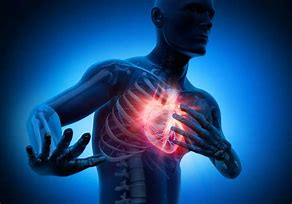

* Cardiovascular event.
* Occurs due to blockage of blood flow to the heart.
* Symptoms include chest pain, shortness of breath, and nausea.
* Can result in permanent damage to the heart muscle.
* Prompt medical intervention is critical for survival.

#### How Does it Occur?

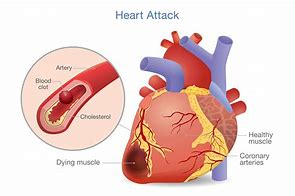

* Formation of plaque in coronary arteries.
* Plaque rupture leads to blood clot formation.
* Blood clot blocks blood flow in coronary artery.
* Reduced or blocked blood flow deprives heart muscle of oxygen.
* Resulting tissue damage or cell death manifests as a heart attack.

#### What are the symptoms of heart Attack?

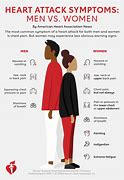

#### 1.2 Recognizing Variables In The Dataset <a id=3></a>

* age - Age of the person.
* sex - Gender of the person.
* cp - Chest Pain type chest pain type.
* trtbps - resting blood pressure (in mm Hg).
* chol - cholestoral in mg/dl fetched via BMI sensor.
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false).
* restecg - resting electrocardiographic results.
* thalach - maximum heart rate achieved.
* exang - exercise induced angina (1 = yes; 0 = no).
* oldpeak - Previous peak.
* slope - Slope.
* ca - number of major vessels (0-3).
* thal - Thal rate.
* target - Target variable.

### 2. First Organization <a id =4></a>

#### 2.1 Rquired Python Libraries <a id=5></a>

#### 2.1.1 Basic Libraries <a id =6></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


#### Loading The Dataset <a id =7></a>

In [2]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [3]:
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

#### Initial Analysis On The Dataset <a id =8></a>

In [4]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [5]:
# Some of the variable names differs fromt the name in the Description
# We are gonna change the names to the previous name we learned by creating a new col.
new_columns = ["age","sex","cp","trtbps","chol","fbs","rest_ecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [6]:
df.columns = new_columns

In [7]:
df.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slope  \
0   63    1   3     145   233    1         0      150      0      2.3      0   
1   37    1   2     130   250    0         1      187      0      3.5      0   
2   41    0   1     130   204    0         0      172      0      1.4      2   
3   56    1   1     120   236    0         1      178      0      0.8      2   
4   57    0   0     120   354    0         1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [8]:
# Study the table
# Each row represents only one patient

In [9]:
# Lets Find the shape of the data
print("shape of Dataset:", df.shape)

shape of Dataset: (303, 14)


In [10]:
# Gettting to know some information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* All variables are in numerical, if not convert to numeric.
* If there's a variable that is of Object type and isn't supposed to be.. Clear the variable and change to the relevant type.
* Or we can have a preference to remove the missing values and should be the last choice.

In [11]:
# check if there's a missing values in all variables
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Analysis Outputs(1)<a id =9></a>

* The Dataset consists of 303 Rows and 14 Columns.
* The type of all the variables in the data set are in numerical format.(integer or float).
* According to first impressions, there is no missing values(NaN Value) in the dataset.

#### 3. Preparation for Exploratory Data Analysis(EDA)<a id = 10></a>

#### 3.1 Examining Missing Values <a id=11></a>

* Any missing data will create distortion in visualization
* It will cause the model to have a low accuracy.
* Appropraite values are replaced for the missing values.

In [12]:
df.isnull().sum()
# Still there's no missing values in the dataset

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# Looping through all variables in the dataset in other and find missing values.
# Call the variables of the dataset using the 
# This code fetches missing data from the whole dataframe.
# It saves the values to the x and append it to the isnull_number.
# Creates a dataFrame of the missing values.
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing values"])

Total Missing values
age                          0
sex                          0
cp                           0
trtbps                       0
chol                         0
fbs                          0
rest_ecg                     0
thalach                      0
exang                        0
oldpeak                      0
slope                        0
ca                           0
thal                         0
target                       0

<Axes: >

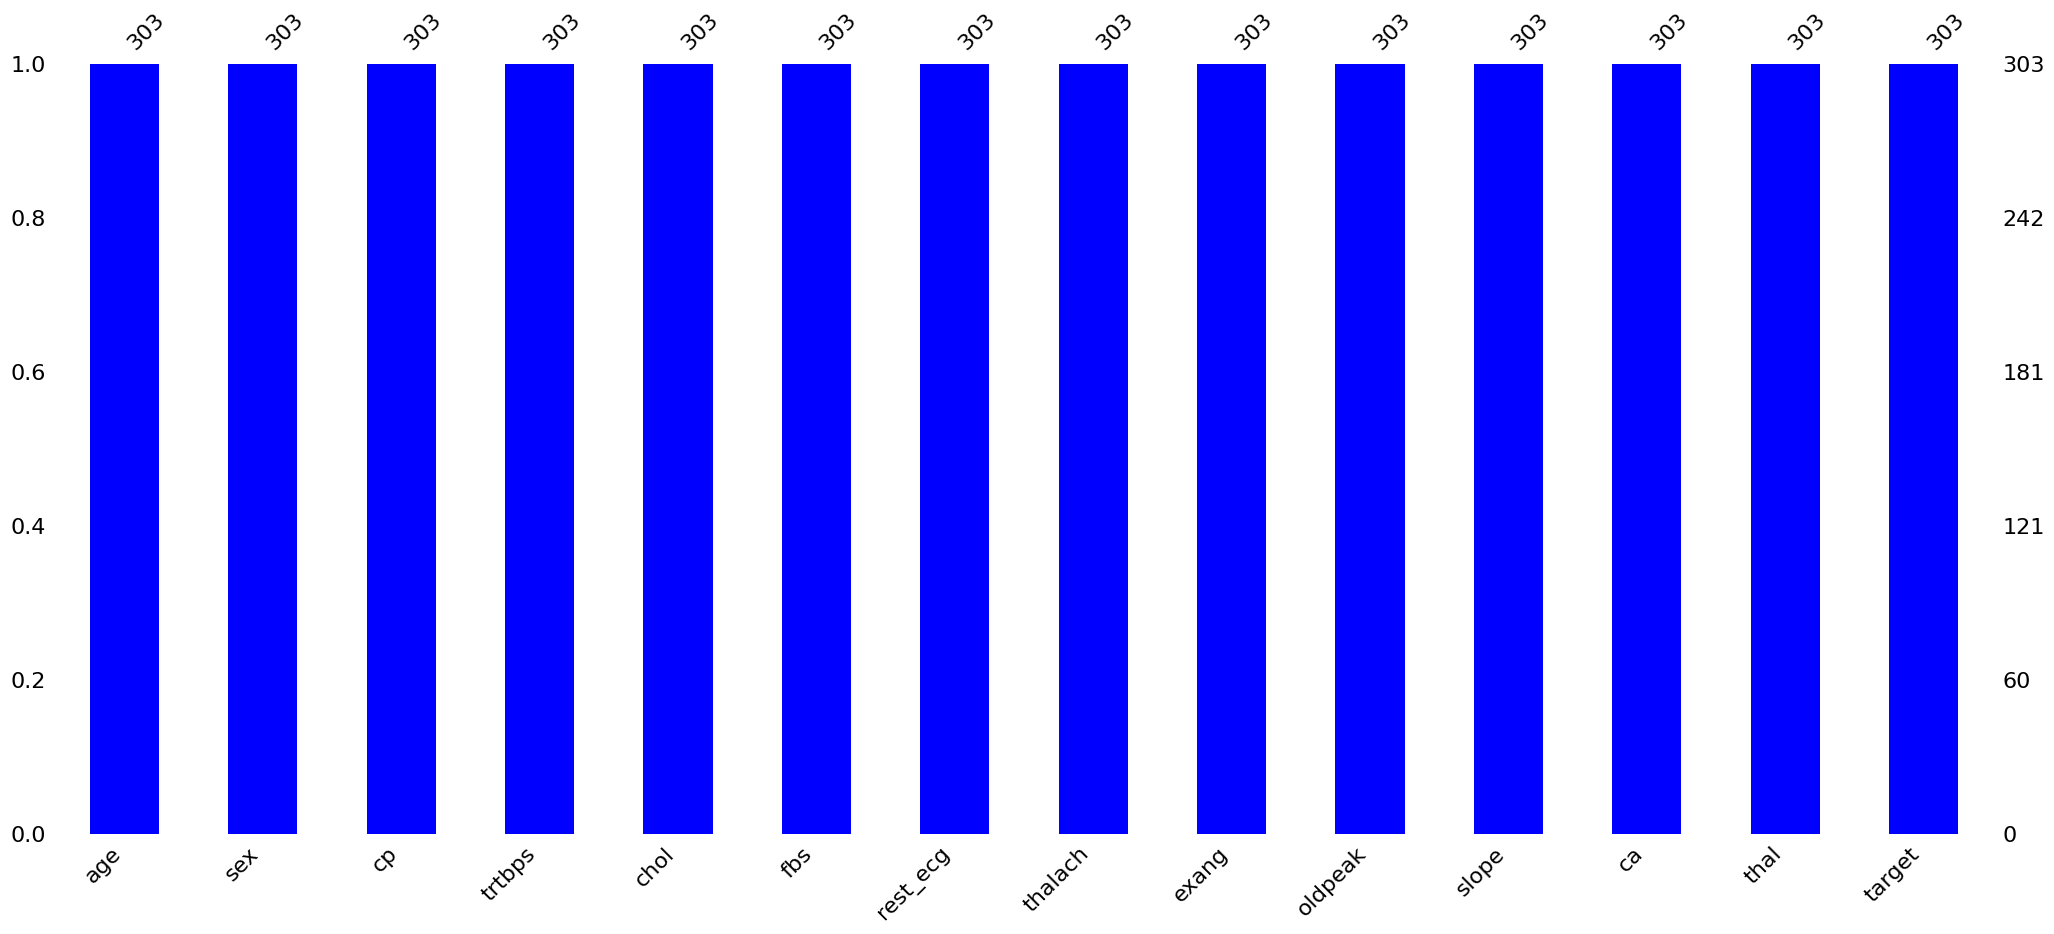

In [14]:
# Visualizen the missing data using the missingno library
import missingno
missingno.bar(df, color="b")

#### 3.2 Examining Unique Values <a id=12></a>

In [15]:
# Observation values that are not the similar to each other in the variables
df.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slope  \
0   63    1   3     145   233    1         0      150      0      2.3      0   
1   37    1   2     130   250    0         1      187      0      3.5      0   
2   41    0   1     130   204    0         0      172      0      1.4      2   
3   56    1   1     120   236    0         1      178      0      0.8      2   
4   57    0   0     120   354    0         1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [16]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [17]:
df["cp"].value_counts().sum()

303

In [18]:
# Total unique values of the variable
df["cp"].value_counts().count()

4

In [19]:
unique_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    unique_number.append(x)
pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique values"])

Total Unique values
age                         0
sex                         0
cp                          0
trtbps                      0
chol                        0
fbs                         0
rest_ecg                    0
thalach                     0
exang                       0
oldpeak                     0
slope                       0
ca                          0
thal                        0
target                      0

#### 3.2.1 Analysis Output 2<a id=13></a>

* <b>According to the result from the  unique dataframe:</b> 
* We determine the variables with few unique values as categorical variables, and the variables with high unique values as numeric variables.
* In this content,<b> Numeric Varibles </b>"age", "trtps", "chol", and "oldpeak"
* <b>Categorical Variables</b> "sex", "cp", "fbs","rest_ecg","exang","slope","ca","thal","target".
* In the next session we will separate these 2 groups into 2 different lists.

#### 3.3 Separating variables(Numeric or Categorical) <a id = 14></a>

In [20]:
df.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slope  \
0   63    1   3     145   233    1         0      150      0      2.3      0   
1   37    1   2     130   250    0         1      187      0      3.5      0   
2   41    0   1     130   204    0         0      172      0      1.4      2   
3   56    1   1     120   236    0         1      178      0      0.8      2   
4   57    0   0     120   354    0         1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

#### 3.4 Examining Statistics of Variables<a id= 18></a>

In [21]:
# Examining basic statistical variables we have.
numeric_var = ["age", "trtbps","chol","thalach","oldpeak"]
categorical_var = ["sex","cp","fbs","rest_ecg","exang","slope","ca","thal","target"]

In [22]:
# Describe method, remove the missing values in the dataset
df[numeric_var].describe()

age      trtbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

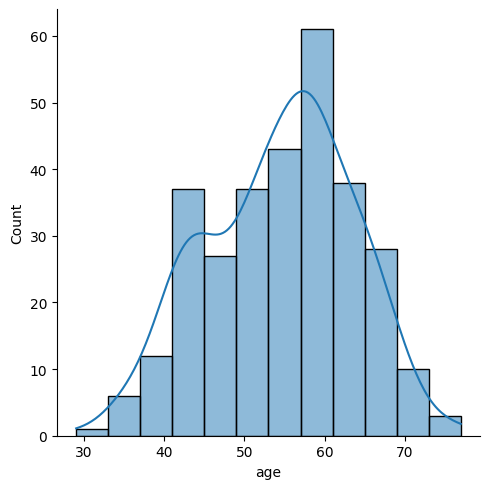

In [23]:
sns.displot(df["age"],kde =True, **dict(linewidth=1, edgecolor="k"))


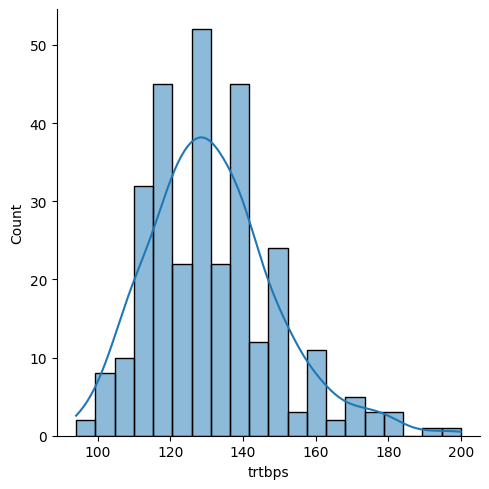

In [24]:
sns.displot(df["trtbps"],kde =True, **dict(linewidth=1, edgecolor="k"), bins =20);

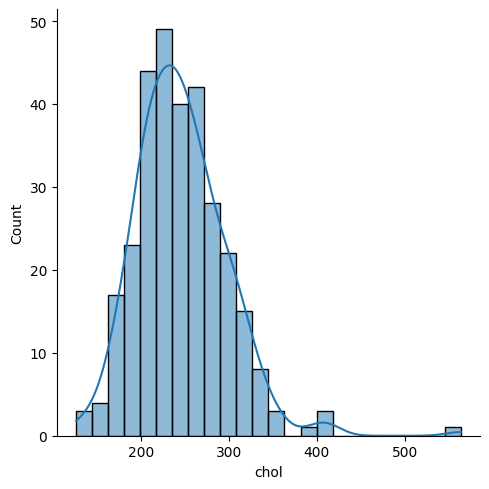

In [25]:
sns.displot(df["chol"], kde = True)

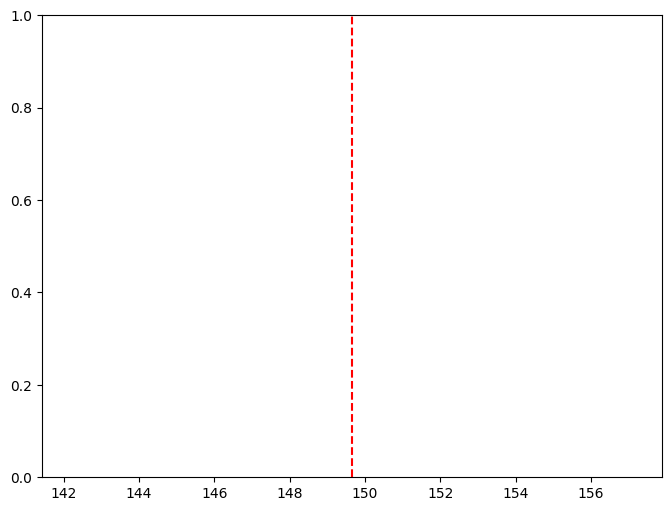

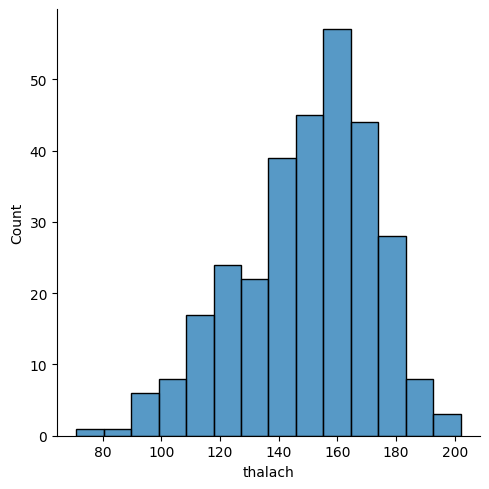

In [26]:
# MArking the exact location of the mean on the axis
x, y =plt.subplots(figsize = (8,6))
sns.displot(df["thalach"], ax = y)
y.axvline(df["thalach"].mean(), color ="r", ls ="--");

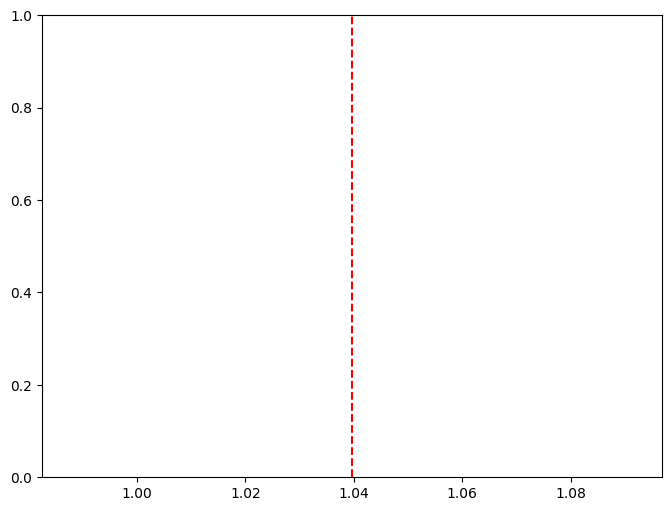

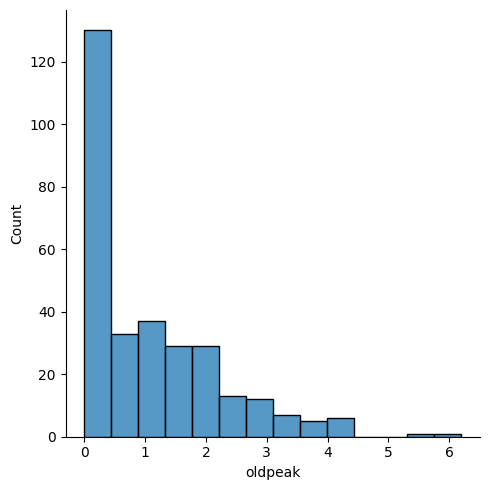

In [27]:
# Examining the last variable
x, y =plt.subplots(figsize = (8,6))
sns.displot(df["oldpeak"], ax = y)
y.axvline(df["oldpeak"].mean(), color ="r", ls ="--");

#### 3.4.1 Analysis Output(3)<a id=19></a>

* Separate Data into Numeric and Categorical

In [28]:
numeric_var = ["age", "trtbps","chol","thalach","oldpeak"]
categorical_var = ["sex","cp","fbs","rest_ecg","exang","slope","ca","thal","target"]

#### 4. Exploratory Data Analysis(EDA)<a id = 15></a>

##### Using visuals to determine the characteristic of variable

#### 4.1 Uni-variate Analysis<a id = 16></a>
#### 4.1.1 Numerical variables(Analysis With Displot)<a id = 17></a>

In [29]:
# Visuals for the Numeric variables
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [30]:
numeric_axis_name = ["Age of the  Patient","Resting Blood Pressure","Cholestrol","Maximum Heart Rate Achieved","ST Depression"]

In [31]:
# creating a list for the specific Titles.
list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of the  Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholestrol'),
 ('thalach', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

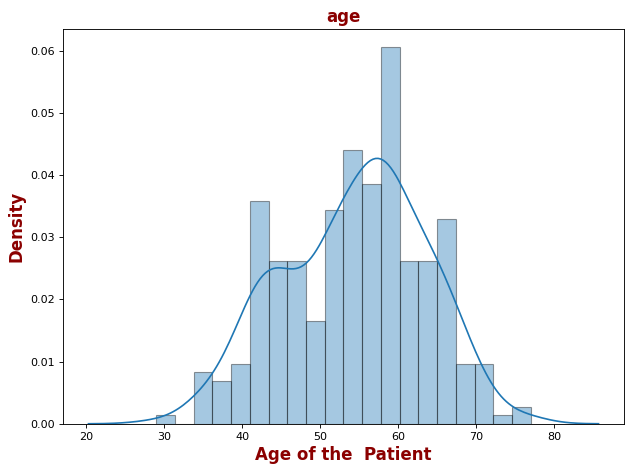

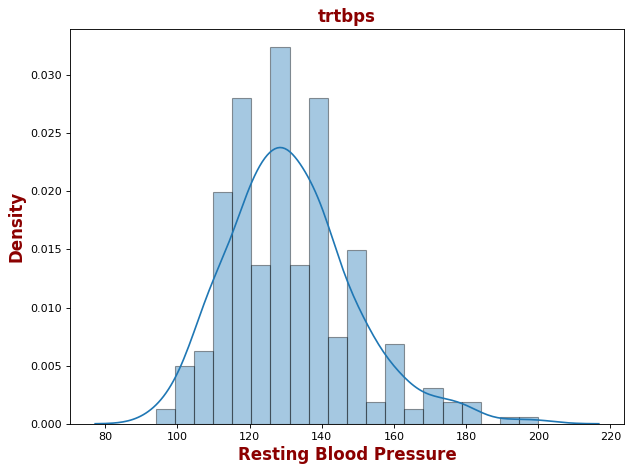

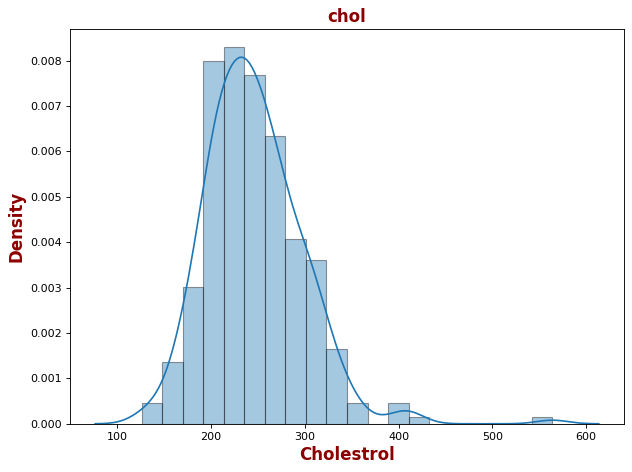

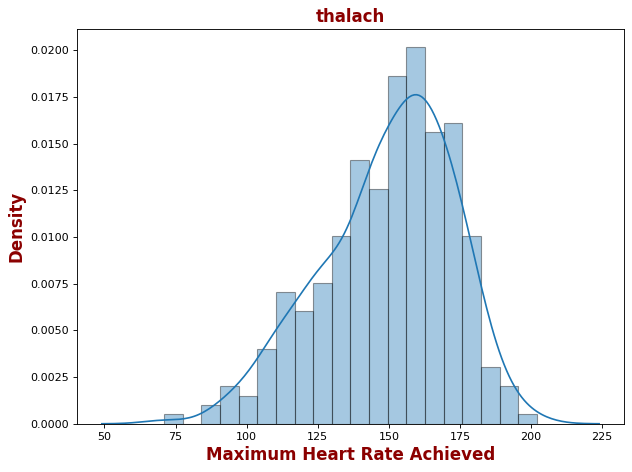

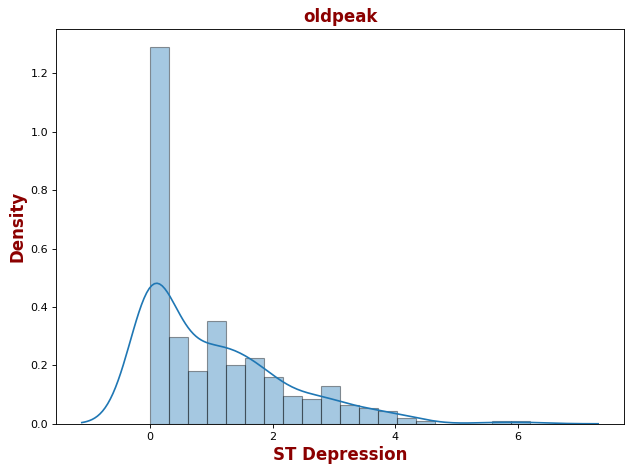

In [32]:
# set up a forloop to plot the visual for each variable, instead of doing them seperately
# Using displot for the visualization.


# Creating a dictionary for the font style for the title and axis.
title_font = {"family":"arial", "color":"darkred", "weight":"bold", "size": 15}
axis_font = {"family":"arial", "color":"darkred", "weight":"bold", "size": 15}



for i, z in list(zip(numeric_var, numeric_axis_name)):# z is for fecthing the variables for the title.
    plt.figure(figsize=(8,6), dpi = 80)
    sns.distplot(df[i], hist_kws =dict(linewidth=1, edgecolor = "k"), bins =20);
    
    
    plt.title(i, fontdict= title_font) #----> title function to chage the apperance
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font) # Y_label show be the density istead of i for the actual column(variable)
    
#   images should not contact each other
    plt.tight_layout()
    plt.show()
    
#   X-axis will have the same name as the title

#### 4.1.1.1 Analysis Output(4)<a id=20></a>

#### 4.1.2 Categorical Variable(Analysis with <b>Pie Chart</b>) <a id = 21></a>

In [33]:
categorical_var 

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [34]:
# Examine the visual of each varaible
# Bar chart or pie chart can be used but we are gonna use pie Chart


categoric_axis_name = ["Gender","Chest Pain Type", "Fasting Blood Sugar"," Resting Electrocardiographic Results",
                      "Exercise Induced Angina","The Slope of ST Segment","Number of Major Vessels","Thal","Target"]

In [35]:
categoric_axis_name

['Gender',
 'Chest Pain Type',
 'Fasting Blood Sugar',
 ' Resting Electrocardiographic Results',
 'Exercise Induced Angina',
 'The Slope of ST Segment',
 'Number of Major Vessels',
 'Thal',
 'Target']

In [36]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [37]:
# We have to create a list for the value at the left and the right separately
# for the Right
list(df["cp"].value_counts())

[143, 87, 50, 23]

In [38]:
list(df["cp"].value_counts().index)

[0, 2, 1, 3]

In [39]:
list(zip(categorical_var,categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood Sugar'),
 ('rest_ecg', ' Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

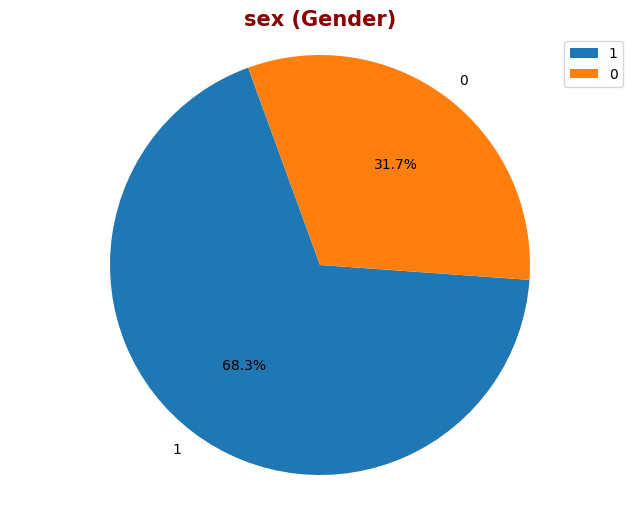

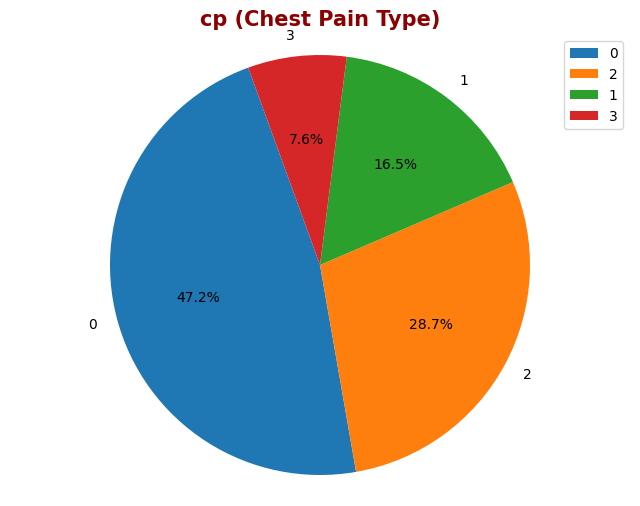

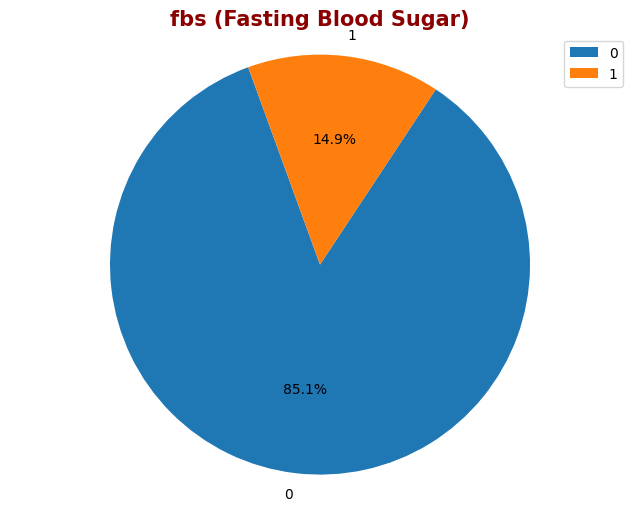

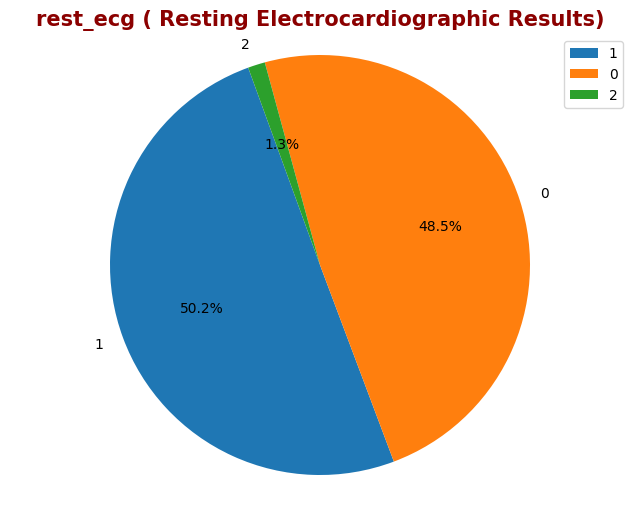

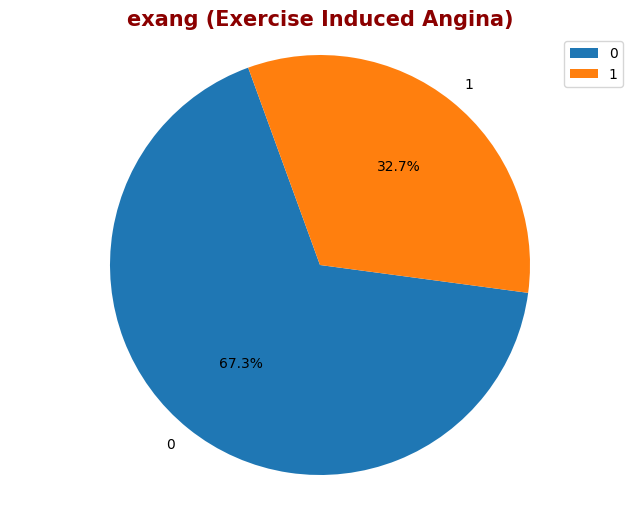

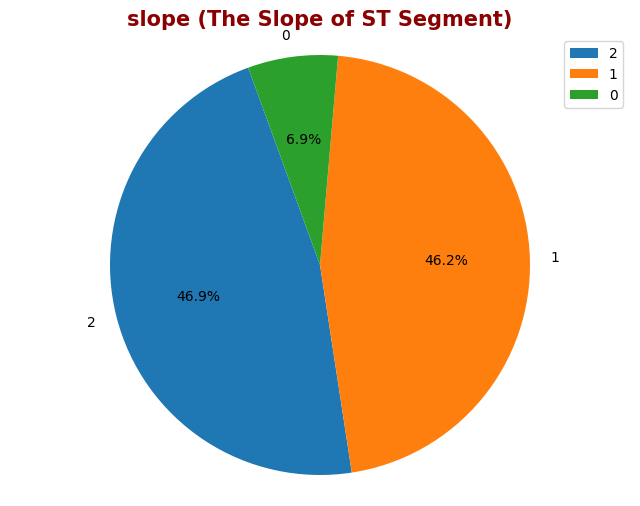

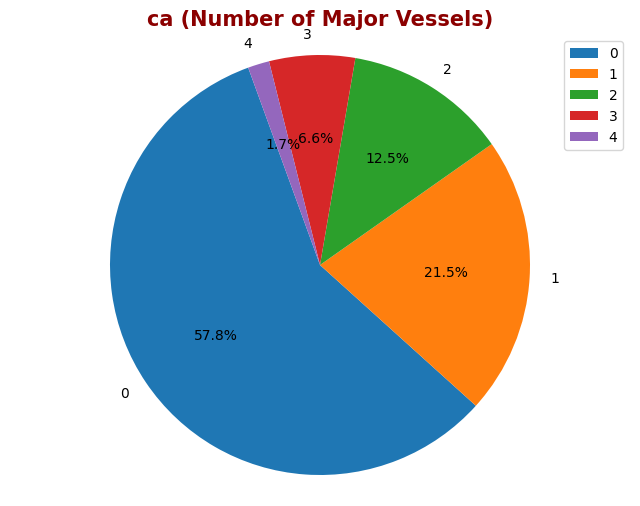

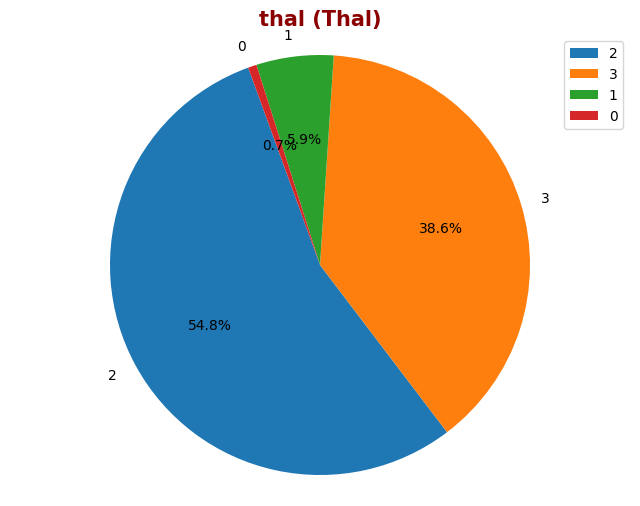

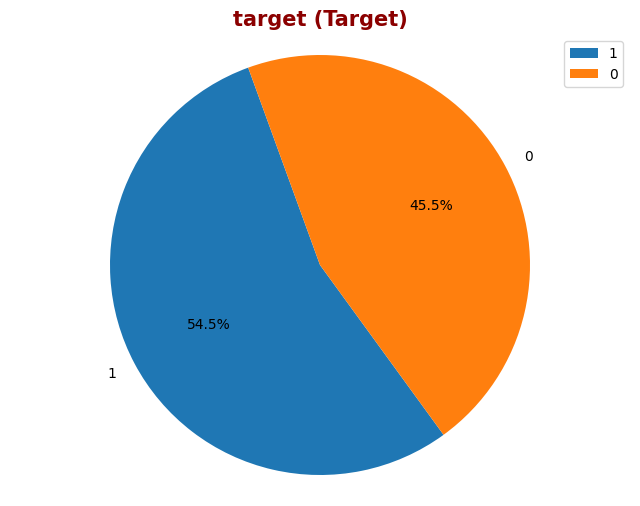

In [40]:
# Creating dict for the font
title_font = {"family":"arial", "color":"darkred", "weight":"bold", "size": 15}
axis_font = {"family":"arial", "color":"darkred", "weight":"bold", "size": 15}

for i,z in list(zip(categorical_var,categoric_axis_name)): # The binary structures of the list will loop anytime everytime the loop starts.
    fig, ax = plt.subplots(figsize = (8,6))
#  what we will do with the values in the body of the for loop.
    
#  Create two variables for the list above(Left and Right)
    observation_values = list(df[i].value_counts().index) # assigning obervations to a var.
    total_observation_values = list(df[i].value_counts()) #total observations
    
    ax.pie(total_observation_values, labels =observation_values, autopct = '%1.1f%%', startangle =110, labeldistance = 1.1)
    ax.axis("equal") # Creates equal aspect ratio
    
    
#   Creating the titles
    plt.title(i + " (" + z + ")", fontdict=title_font)
    plt.legend()
    plt.show()

#### 4.1.2.1 Analysis Output(5) <a id =22></a>

#### 4.1.2.2 Examining The Missing Data According to The Analysis Result<a id =23></a>

In [41]:
# Gonna remove missing values and fill in with data that make sense.
# Finding the values that are 0 in the "thal" varibable
df[df["thal"]==0]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
48    53    0   2     128   216    0         0      115      0      0.0   
281   52    1   0     128   204    1         1      156      1      1.0   

     slope  ca  thal  target  
48       2   0     0       1  
281      1   0     0       0

#### Two of the values are zero, hence we gonna replace them instead of deleting

In [42]:
df["thal"]=df["thal"].replace(0, np.nan)

In [43]:
# Checking for the columns of the victim variable
df.loc[[48, 281], :]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
48    53    0   2     128   216    0         0      115      0      0.0   
281   52    1   0     128   204    1         1      156      1      1.0   

     slope  ca  thal  target  
48       2   0   NaN       1  
281      1   0   NaN       0

In [44]:
# Has to check for the missing values again
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing values"])

Total Missing values
age                          0
sex                          0
cp                           0
trtbps                       0
chol                         0
fbs                          0
rest_ecg                     0
thalach                      0
exang                        0
oldpeak                      0
slope                        0
ca                           0
thal                         2
target                       0

* You can use variance method when filling missing data in a categorical varaible.
* Most used method is filling missing values.

In [45]:
# From here, check for the maximum observation value in the variable
#  Replace with the missing values
# in this case 2 for the "thal" variable
df["thal"] = pd.to_numeric(df["thal"], downcast="integer")

In [46]:
# Checking the unique values in the variable
df["thal"].value_counts()

thal
2.0    166
3.0    117
1.0     18
Name: count, dtype: int64

#### 4.2 Bi-Variate Analysis<a id=24></a>

#### 4.2.1 Numerical variables -Target variable(Analysis with FaceGrid)<a id=25></a>

In [47]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [48]:
# add the target variable to the numeric variables.
numeric_var.append("target")

In [49]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

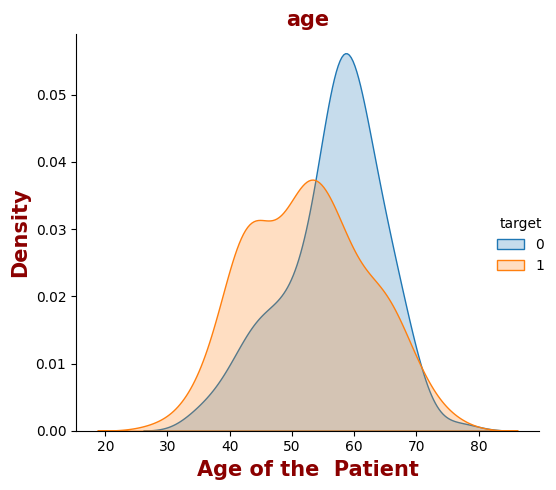

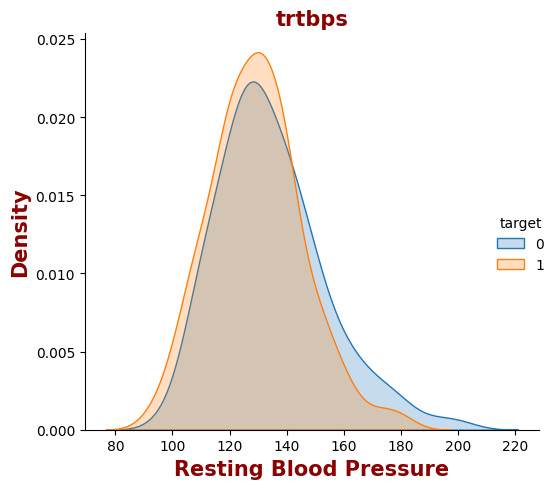

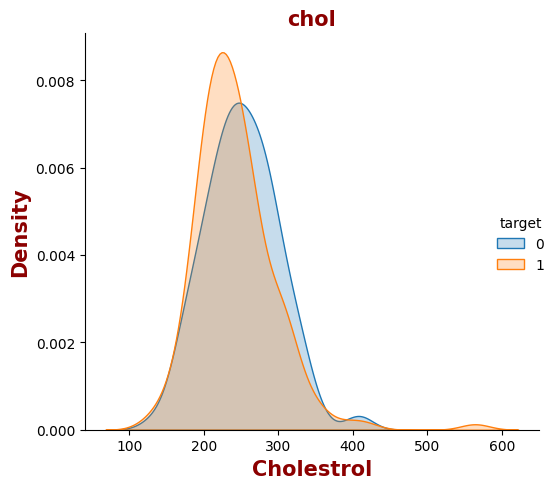

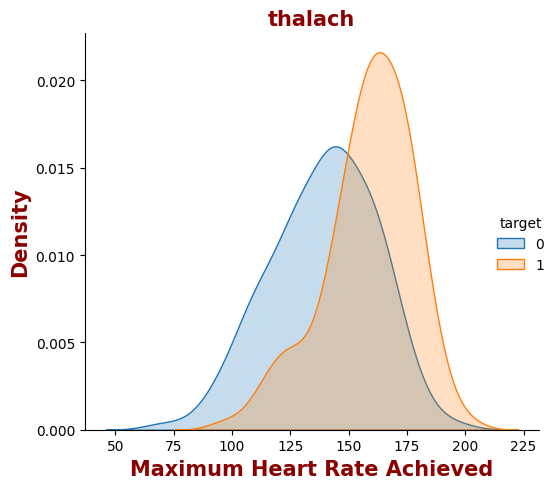

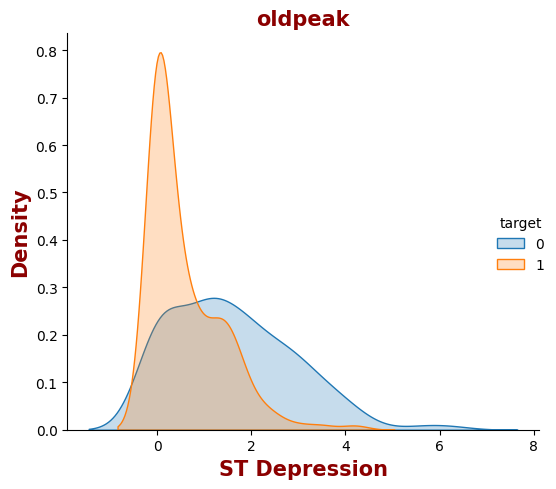

In [50]:
# Analyzing each variable with the target variable using visaulization
# Creating a dictionary for the font style for the title and axis.
title_font = {"family":"arial", "color":"darkred", "weight":"bold", "size": 15}
axis_font = {"family":"arial", "color":"darkred", "weight":"bold", "size": 15}



for i, z in list(zip(numeric_var, numeric_axis_name)):# z is for fecthing the variables for the title.
    graph = sns.FacetGrid(df[numeric_var], hue="target",height=5, xlim=None, ylim=None)
    graph.map(sns.kdeplot, i, shade=True)
    graph.add_legend()                    
                         
                         
    plt.title(i, fontdict= title_font) #----> title function to chage the apperance
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font) # Y_label show be the density istead of i for the actual column(variable)
    
#   images should not contact each other
    plt.tight_layout()
    plt.show()
    

#### * 4.2.2 Categorical Variables - Target variable(Analysis with Count Plot)<a id =26></a>

In [51]:
categorical_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [52]:
categorical_var.append("target")

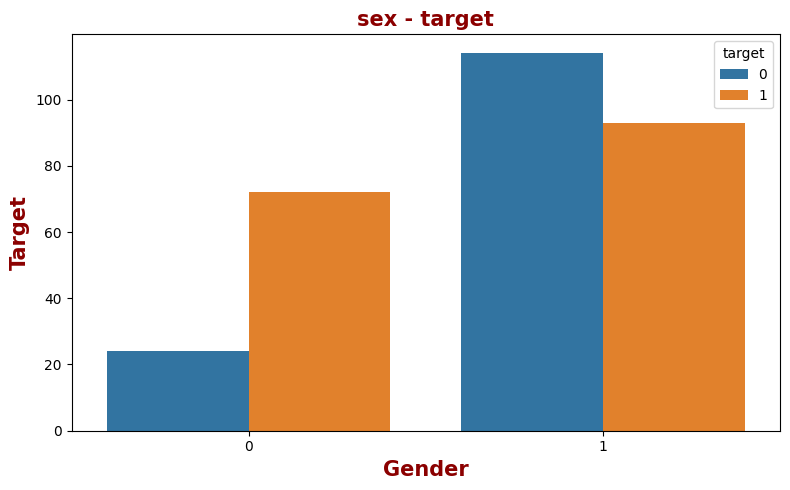

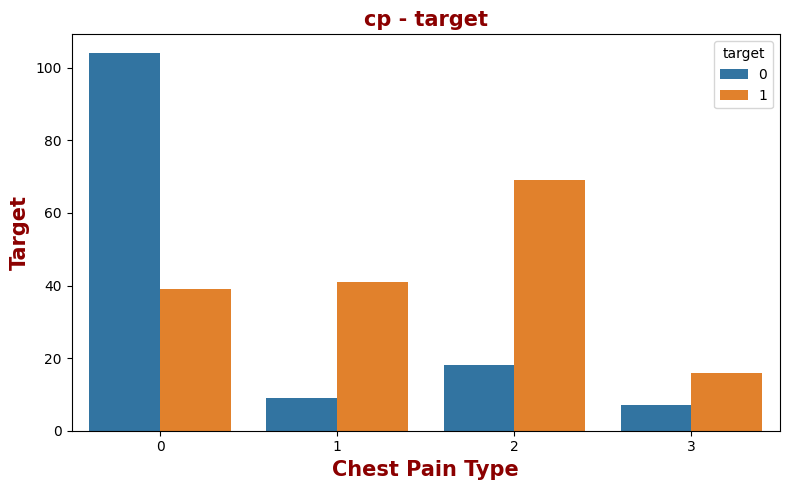

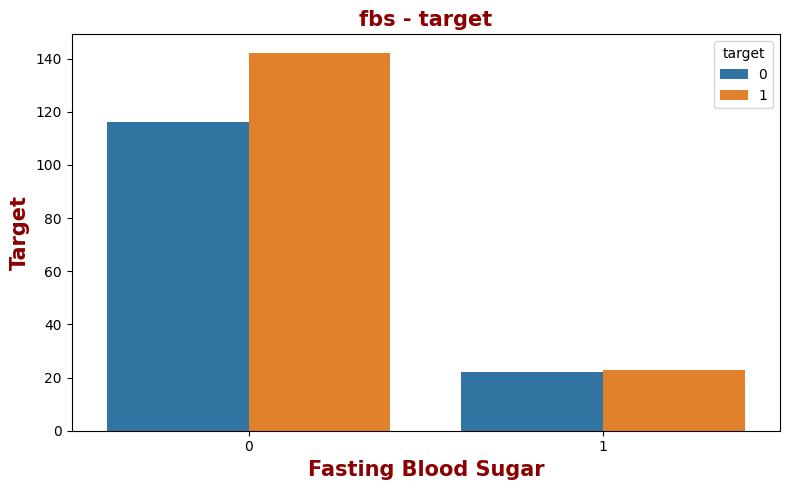

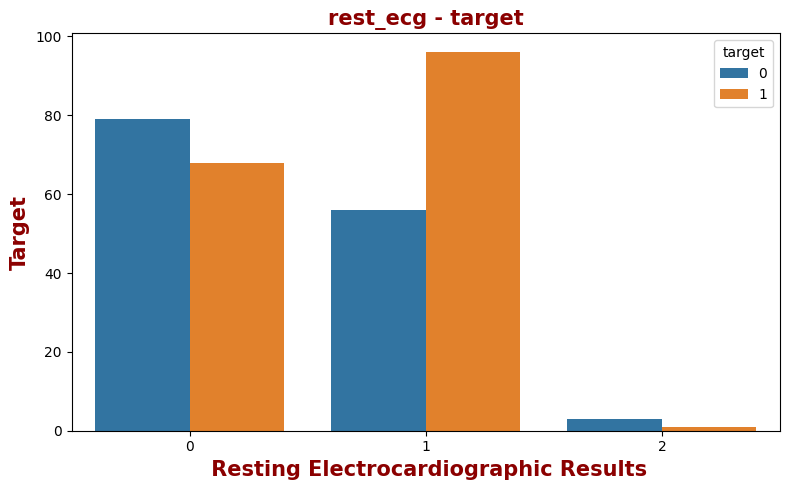

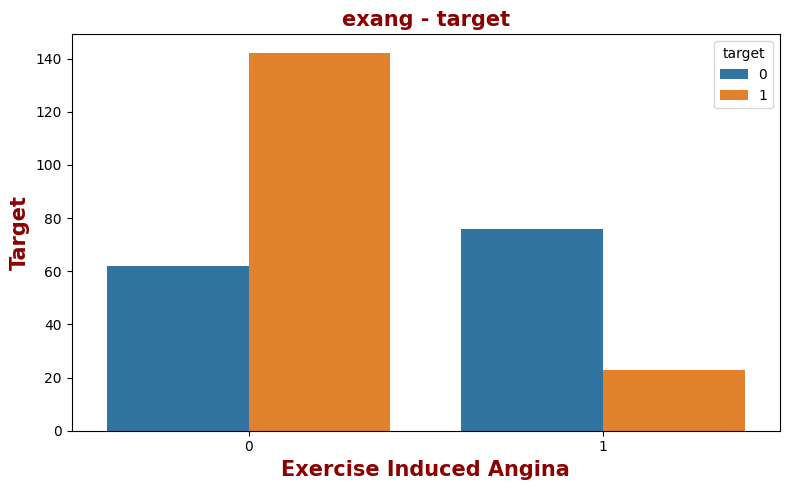

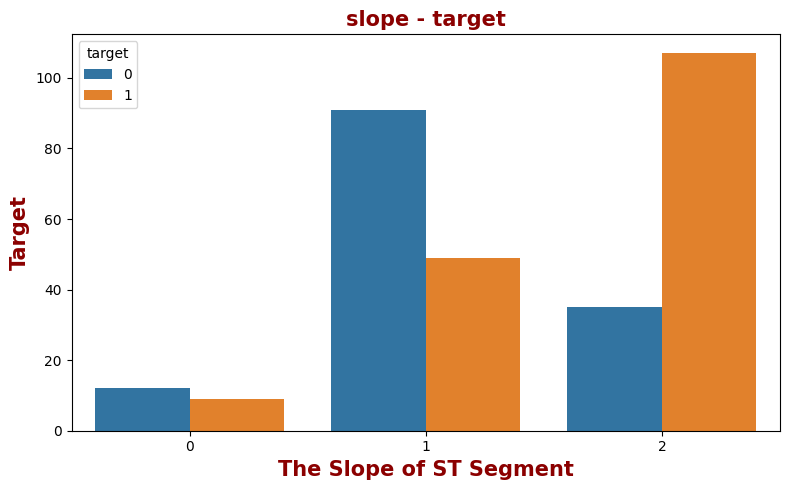

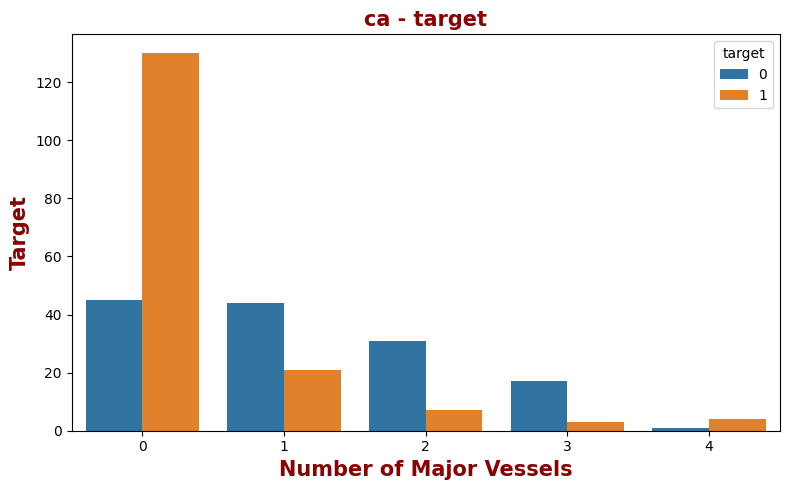

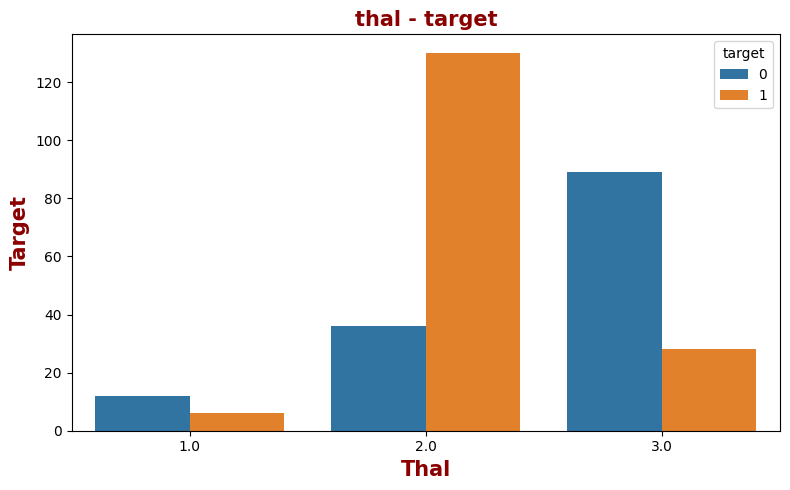

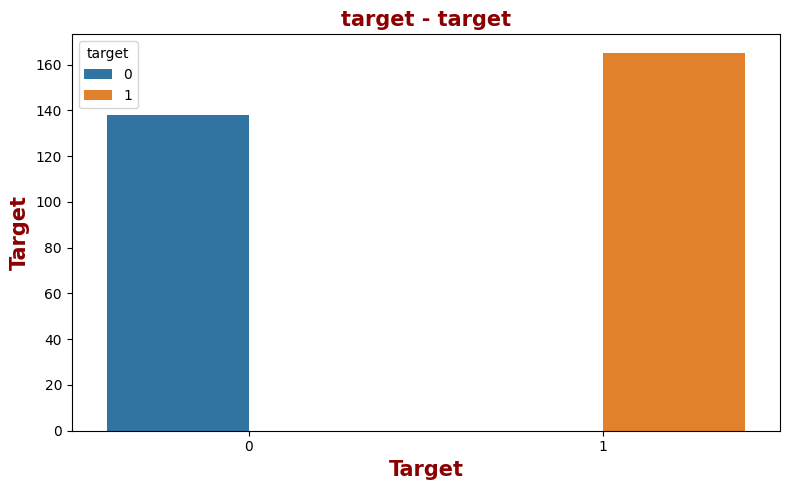

In [53]:
# Examining the relationship of all the categorical varibles with the target variable.
title_font = {"family":"arial", "color":"darkred", "weight":"bold", "size": 15}
axis_font = {"family":"arial", "color":"darkred", "weight":"bold", "size": 15}



for i, z in list(zip(categorical_var,categoric_axis_name)):# z is for fecthing the variables for the title.
    plt.figure(figsize = (8,5))
    sns.countplot(x=i, data = df, hue="target")
    
                         
                         
    plt.title(i + " - target", fontdict= title_font) #----> title function to chage the apperance
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Target", fontdict = axis_font) # Y_label show be the density istead of i for the actual column(variable)
    
#   images should not contact each other
    plt.tight_layout()
    plt.show()
    

In [54]:
df[categorical_var].corr().iloc[:, [-1]]

target
sex      -0.280937
cp        0.433798
fbs      -0.028046
rest_ecg  0.137230
exang    -0.436757
slope     0.345877
ca       -0.391724
thal     -0.365264
target    1.000000
target    1.000000

#### 4.2.3 Examining Numerical Variables Among Themselves(Analysis with Pair Plot) <a id =27></a>

In [55]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [56]:
numeric_var.remove("target")

In [57]:
df[numeric_var].head()

age  trtbps  chol  thalach  oldpeak
0   63     145   233      150      2.3
1   37     130   250      187      3.5
2   41     130   204      172      1.4
3   56     120   236      178      0.8
4   57     120   354      163      0.6

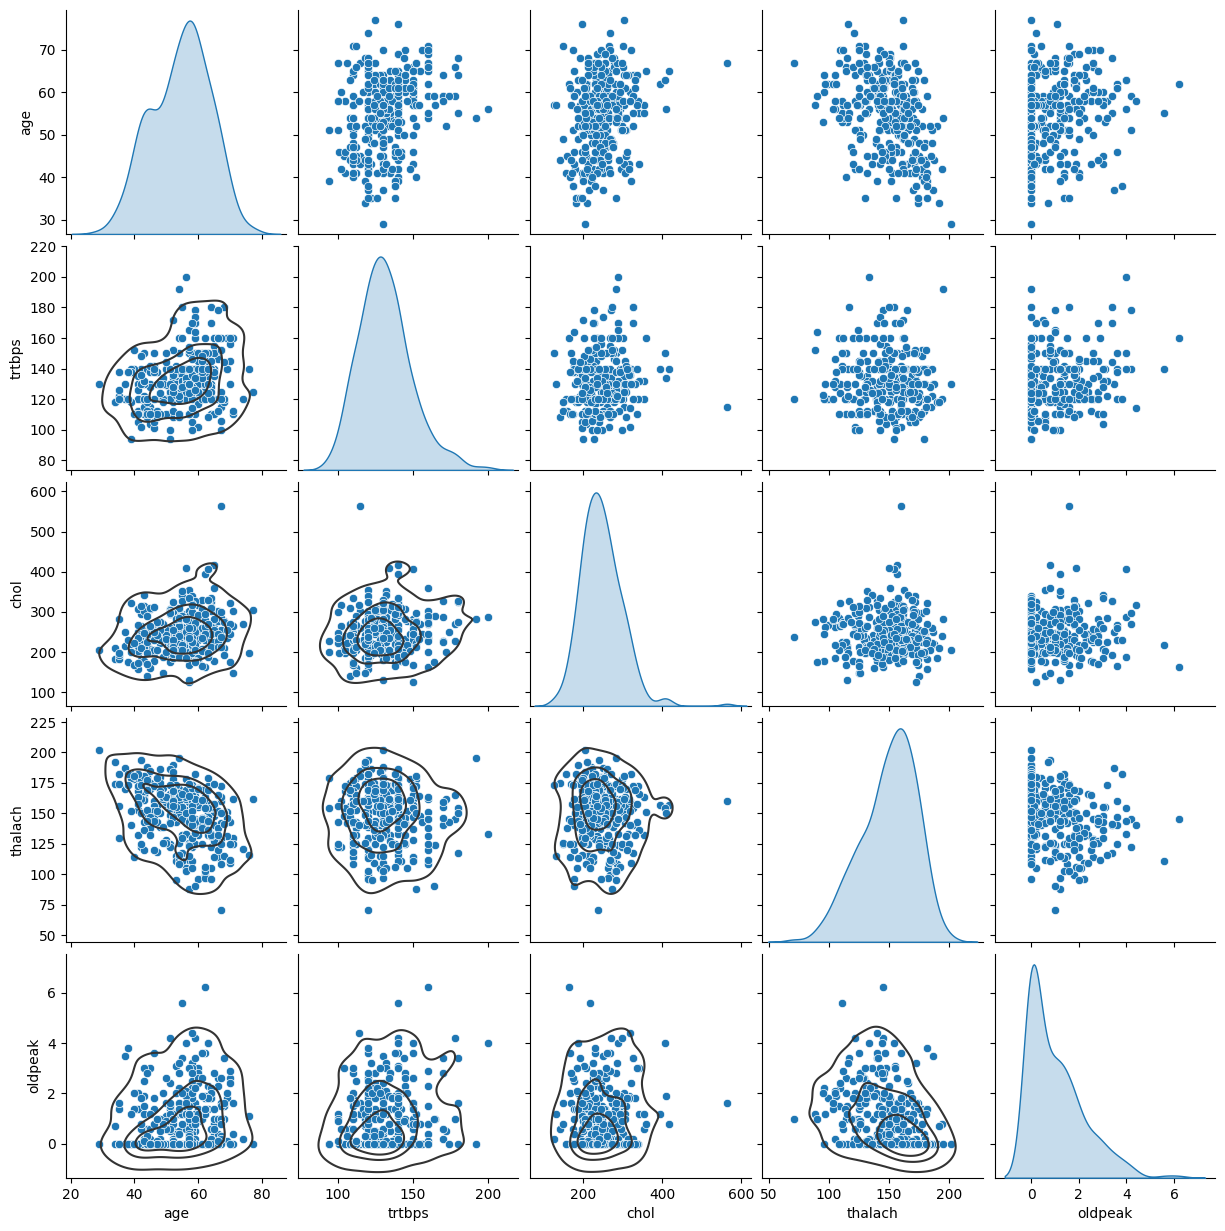

In [58]:
# analysing the numeric variables with pairplot
# Scatterplot uses catesian coordinates
graph = sns.pairplot(df[numeric_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 4, color=".2")
plt.show()

#### * 4.2.4 Feature Scaling with The RobustScaler Method <a id =28></a>

####  Understanding RobustScaler:
Robust to Outliers: Unlike standard scaling methods like MinMaxScaler or StandardScaler, which use the mean and standard deviation, RobustScaler uses median and quartiles, making it robust to outliers. Outliers can heavily influence the mean and standard deviation, leading to poor scaling performance, but they have less effect on the median and quartiles.

In [59]:
from sklearn.preprocessing import RobustScaler

In [60]:
robust_scaler = RobustScaler()

In [61]:
# Transforming the numeric varible with Robust function
scaled_data = robust_scaler.fit_transform(df[numeric_var])

In [62]:
type(scaled_data)

numpy.ndarray

In [63]:
# converting the scaled data into a dataframe
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var)
df_scaled.head()

age  trtbps      chol   thalach  oldpeak
0  0.592593    0.75 -0.110236 -0.092308   0.9375
1 -1.333333    0.00  0.157480  1.046154   1.6875
2 -1.037037    0.00 -0.566929  0.584615   0.3750
3  0.074074   -0.50 -0.062992  0.769231   0.0000
4  0.148148   -0.50  1.795276  0.307692  -0.1250

##### The values in the dataframe has been scaled to a more appropriate range. The distances of the data to each other were scaled to a preferred range.

#### 4.2.5 Creating a New DataFrame Using the Melt() Function <a id = 29></a>

##### What is melt()?
The melt() function in pandas is used to transform or reshape a DataFrame from a wide format to a long format. It essentially unpivots the DataFrame, converting columns into rows.

In [64]:
# Adding the target variable to the scaled data
df_new = pd.concat([df_scaled, df.loc[:,"target"]], axis =1)

In [65]:
df_new.head()

age  trtbps      chol   thalach  oldpeak  target
0  0.592593    0.75 -0.110236 -0.092308   0.9375       1
1 -1.333333    0.00  0.157480  1.046154   1.6875       1
2 -1.037037    0.00 -0.566929  0.584615   0.3750       1
3  0.074074   -0.50 -0.062992  0.769231   0.0000       1
4  0.148148   -0.50  1.795276  0.307692  -0.1250       1

In [66]:
#  Changing the structure of the dataframe using the Melt() Function
melted_data = pd.melt(df_new, id_vars = "target", var_name = "variables",value_name = "value")

In [67]:
melted_data

target variables     value
0          1       age  0.592593
1          1       age -1.333333
2          1       age -1.037037
3          1       age  0.074074
4          1       age  0.148148
...      ...       ...       ...
1510       0   oldpeak -0.375000
1511       0   oldpeak  0.250000
1512       0   oldpeak  1.625000
1513       0   oldpeak  0.250000
1514       0   oldpeak -0.500000

[1515 rows x 3 columns]

#### Visualization with swarmplot
#####  It is used to visualize the distribution of a continuous variable within different categories, similar to a stripplot, but it ensures that points do not overlap.

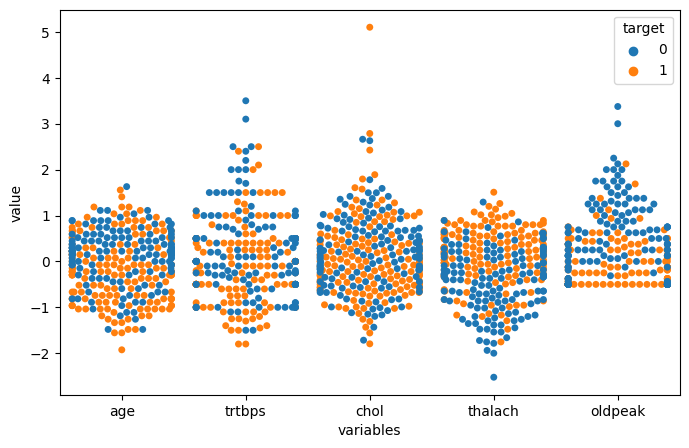

In [68]:
# Visualization using the swanplot
plt.figure(figsize = (8, 5))
sns.swarmplot(x = "variables", y = "value",hue = "target", data = melted_data)
plt.show()

#### 4.2.6 Numerical Variables - Categorical Variables()Analysis with <b>SwarmPlot</b><a id =30></a>

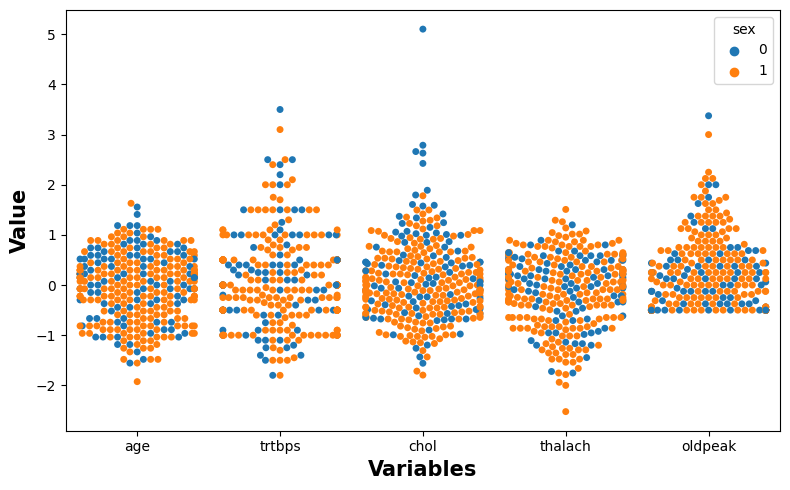

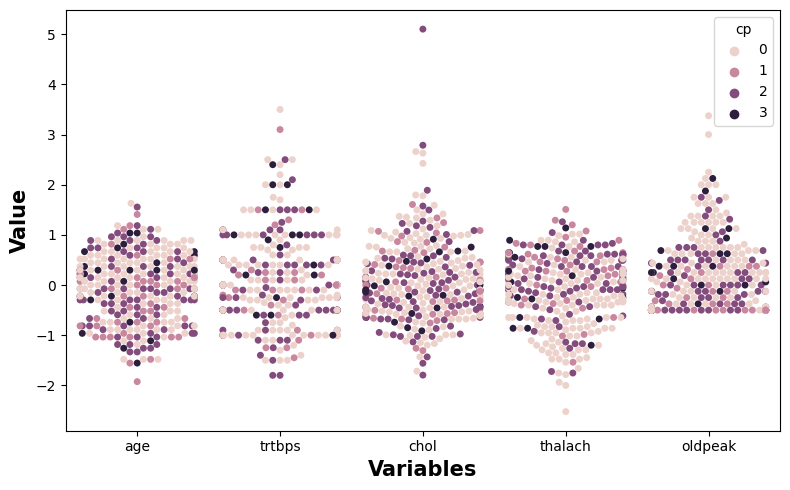

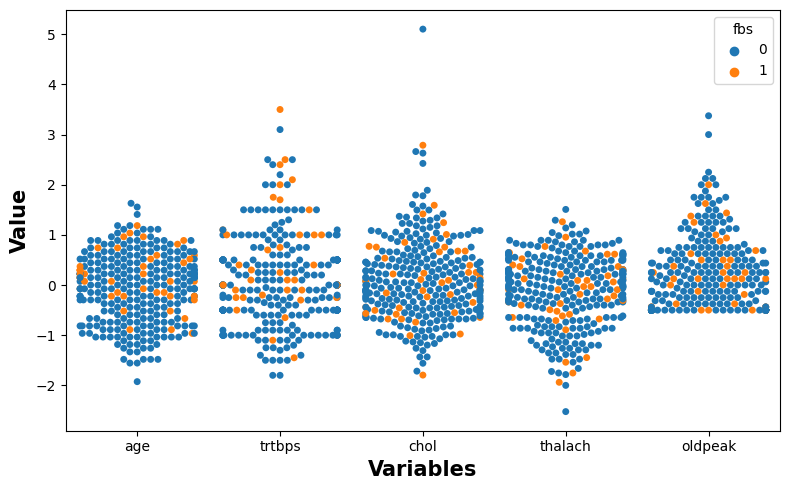

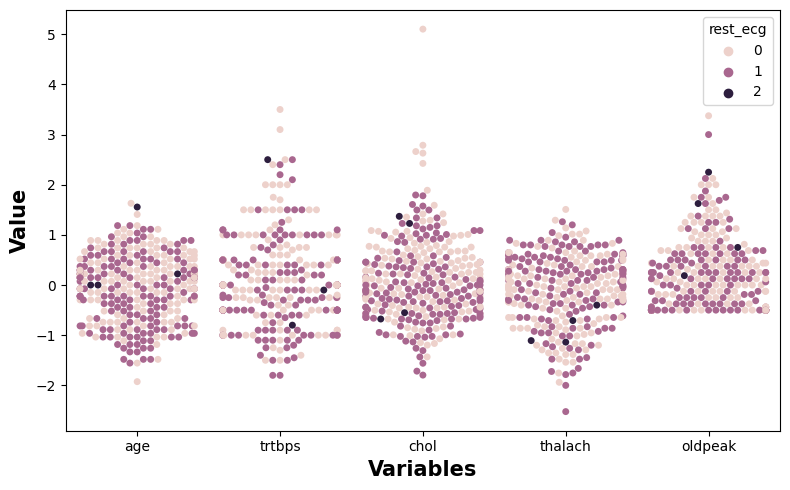

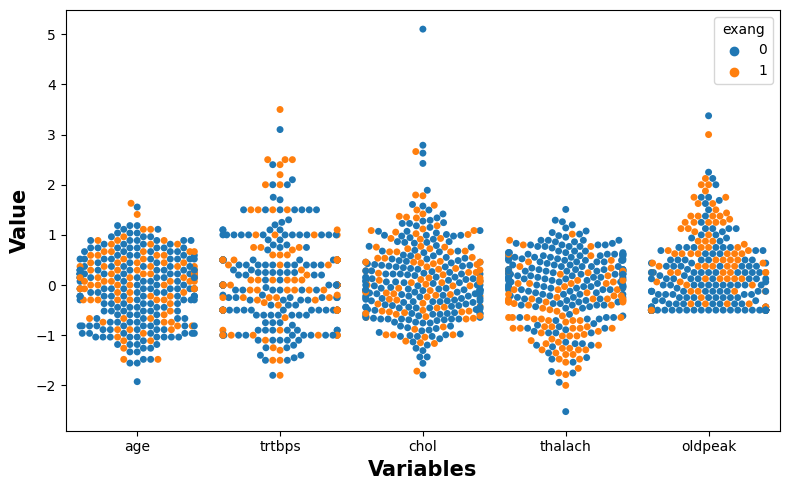

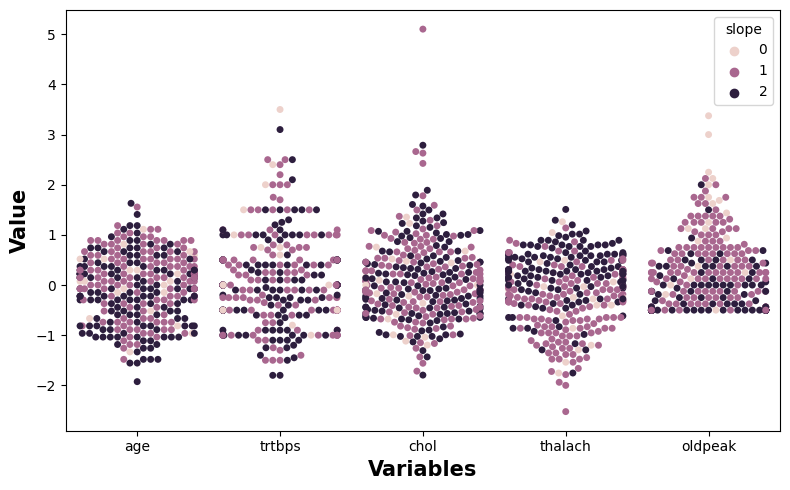

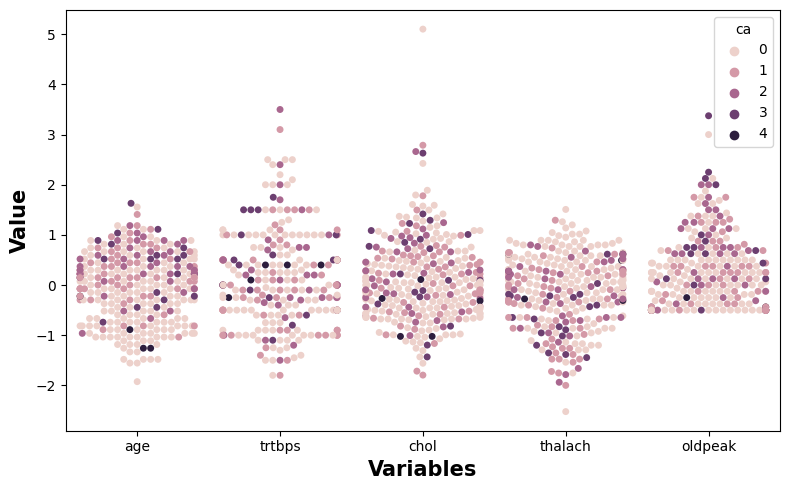

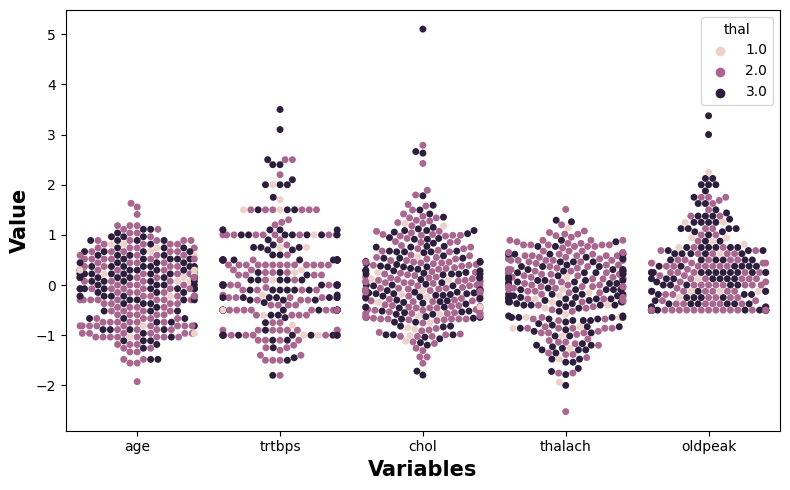

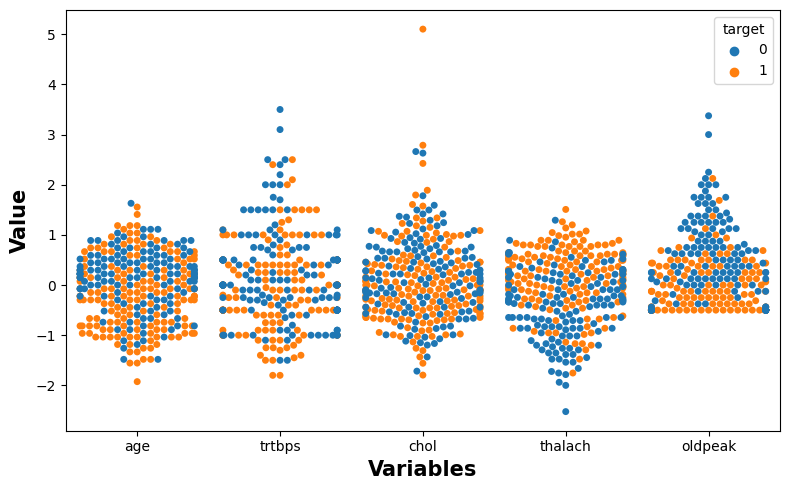

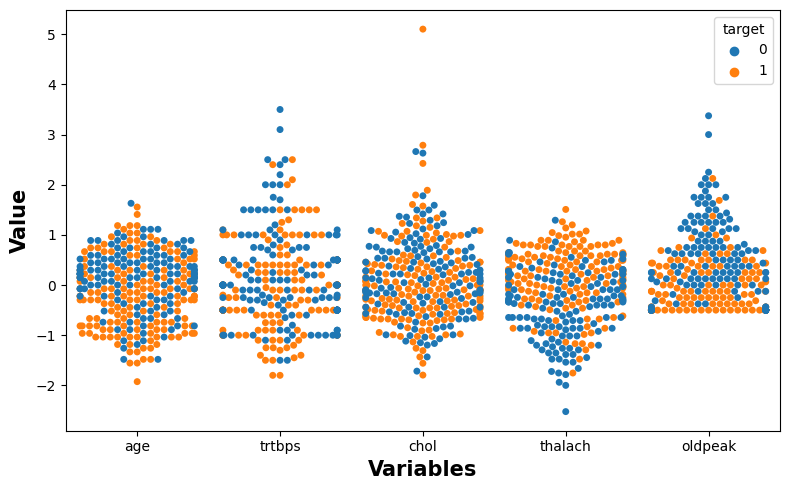

In [69]:
axis_font = {"family":"arial", "color":"black", "weight":"bold", "size": 15}


# visualize all numeric variables and all categorical variable except the target variable
for i in df[categorical_var]:
    df_new = pd.concat([df_scaled, df.loc[:,i]], axis =1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = "variables",value_name = "value")
    
    plt.figure(figsize = (8, 5))
    sns.swarmplot(x = "variables", y = "value",hue = i, data = melted_data)
    
    plt.xlabel("Variables", fontdict = axis_font)
    plt.ylabel("Value", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

##### There are no really a strong correlation between the varibles above

#### 4.2.7 Numerical Variables - Categorical Variables()Analysis with <b>BoxPlot</b> <a id=31></a>

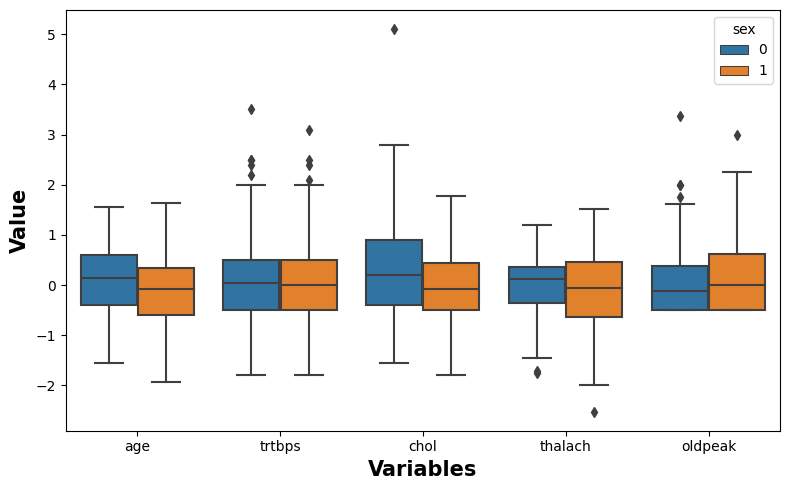

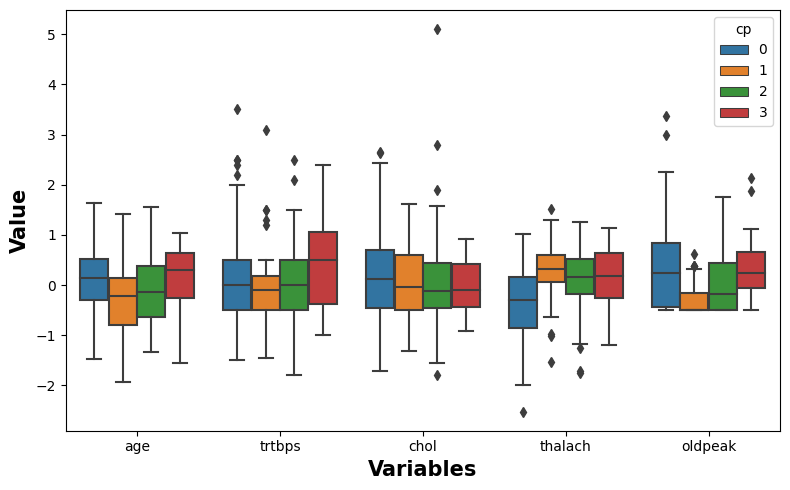

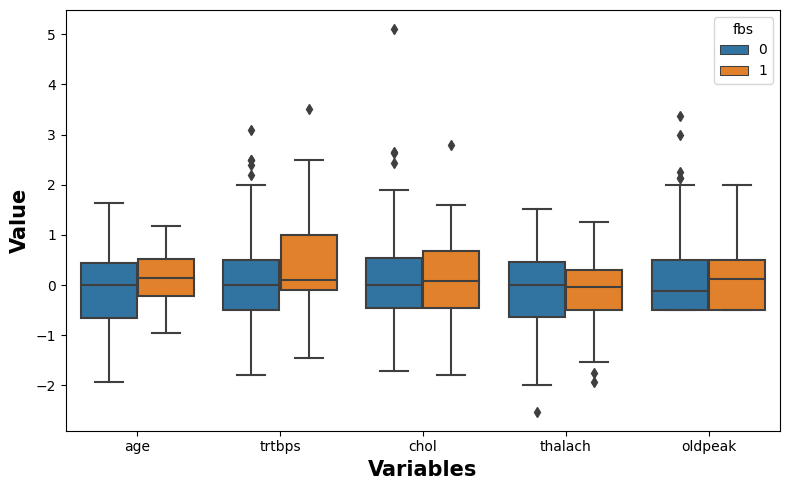

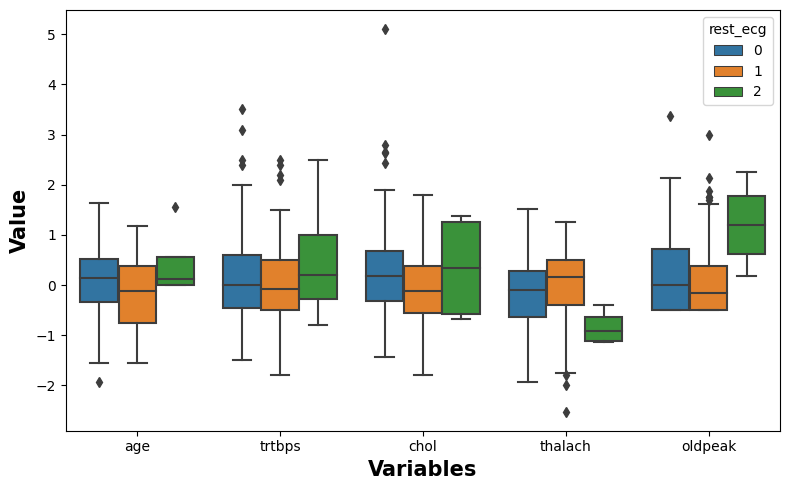

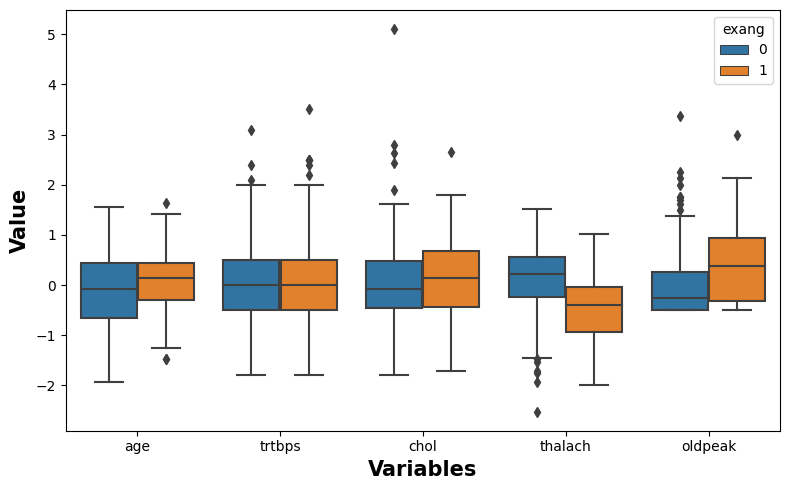

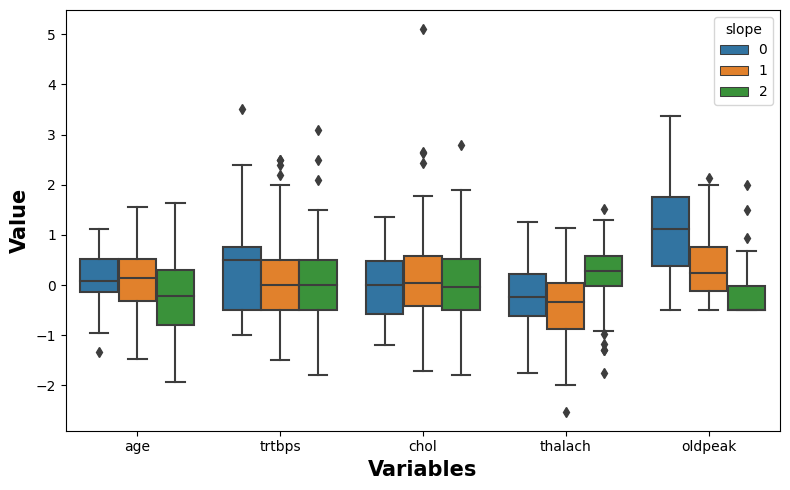

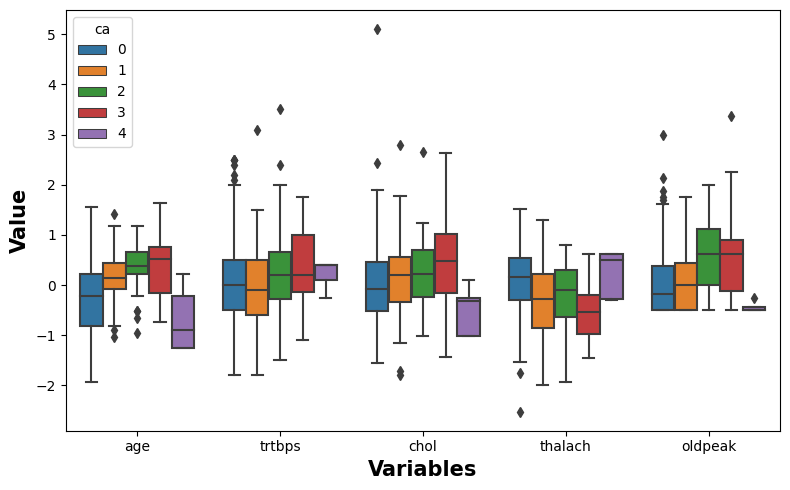

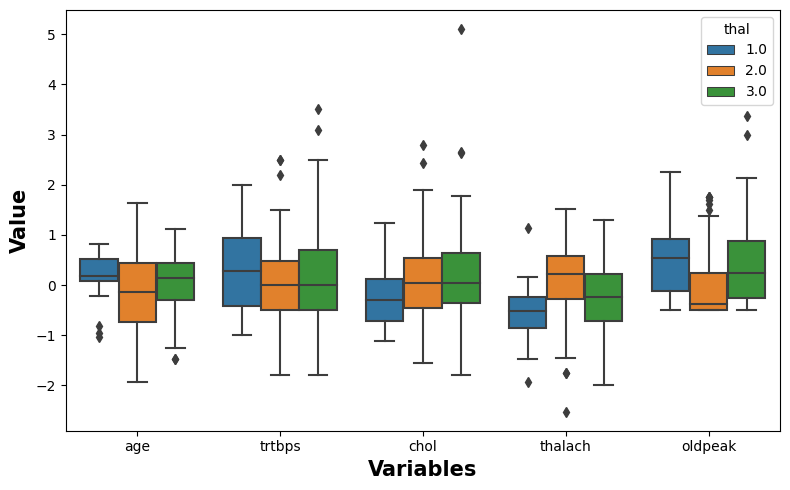

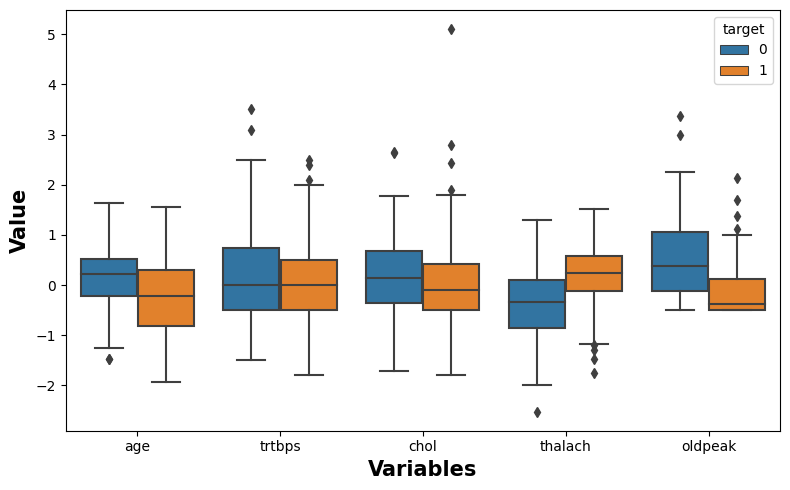

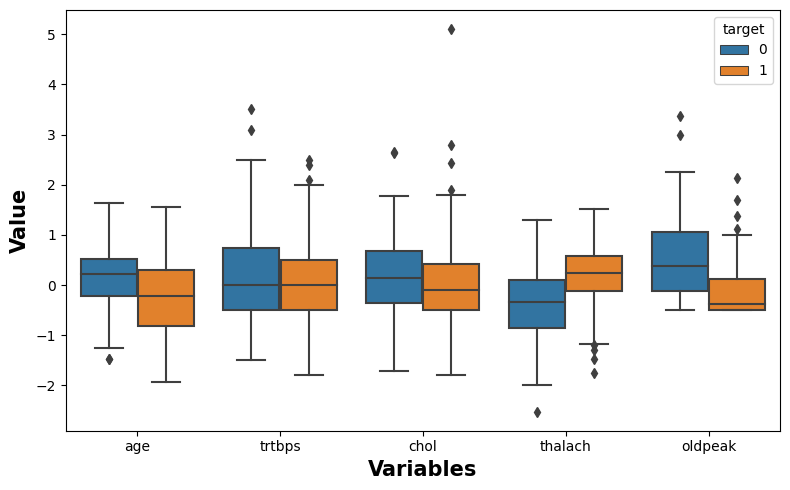

In [70]:
axis_font = {"family":"arial", "color":"black", "weight":"bold", "size": 15}


# visualize all numeric variables and all categorical variable except the target variable
for i in df[categorical_var]:
    df_new = pd.concat([df_scaled, df.loc[:,i]], axis =1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = "variables",value_name = "value")
    
    plt.figure(figsize = (8, 5))
    sns.boxplot(x = "variables", y = "value",hue = i, data = melted_data)
    
    plt.xlabel("Variables", fontdict = axis_font)
    plt.ylabel("Value", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [71]:
# Numerical variables on the direction and the severity of this relatioship

#### 4.2.8 Relationship Between all Variables(Analysis With Heatmap)<a id=32></a>

In [72]:
df_scaled

age  trtbps      chol   thalach  oldpeak
0    0.592593    0.75 -0.110236 -0.092308   0.9375
1   -1.333333    0.00  0.157480  1.046154   1.6875
2   -1.037037    0.00 -0.566929  0.584615   0.3750
3    0.074074   -0.50 -0.062992  0.769231   0.0000
4    0.148148   -0.50  1.795276  0.307692  -0.1250
..        ...     ...       ...       ...      ...
298  0.148148    0.50  0.015748 -0.923077  -0.3750
299 -0.740741   -1.00  0.377953 -0.646154   0.2500
300  0.962963    0.70 -0.740157 -0.369231   1.6250
301  0.148148    0.00 -1.716535 -1.169231   0.2500
302  0.148148    0.00 -0.062992  0.646154  -0.5000

[303 rows x 5 columns]

In [73]:
# Adding the categorical variables to the scaled numeric variables
df_new2 = pd.concat([df_scaled, df[categorical_var]], axis = 1)

In [74]:
df_new2

age  trtbps      chol   thalach  oldpeak  sex  cp  fbs  rest_ecg  \
0    0.592593    0.75 -0.110236 -0.092308   0.9375    1   3    1         0   
1   -1.333333    0.00  0.157480  1.046154   1.6875    1   2    0         1   
2   -1.037037    0.00 -0.566929  0.584615   0.3750    0   1    0         0   
3    0.074074   -0.50 -0.062992  0.769231   0.0000    1   1    0         1   
4    0.148148   -0.50  1.795276  0.307692  -0.1250    0   0    0         1   
..        ...     ...       ...       ...      ...  ...  ..  ...       ...   
298  0.148148    0.50  0.015748 -0.923077  -0.3750    0   0    0         1   
299 -0.740741   -1.00  0.377953 -0.646154   0.2500    1   3    0         1   
300  0.962963    0.70 -0.740157 -0.369231   1.6250    1   0    1         1   
301  0.148148    0.00 -1.716535 -1.169231   0.2500    1   0    0         1   
302  0.148148    0.00 -0.062992  0.646154  -0.5000    0   1    0         0   

     exang  slope  ca  thal  target  target  
0        0      0   0   1.0       1       1  
1        0      0   0   2.0       1       1  
2        0      2   0   2.0       1       1  
3        0      2   0   2.0       1       1  
4        1      2   0   2.0       1       1  
..     ...    ...  ..   ...     ...     ...  
298      1      1   0   3.0       0       0  
299      0      1   0   3.0       0       0  
300      0      1   2   3.0       0       0  
301      1      1   1   3.0       0       0  
302      0      1   1   2.0       0       0  

[303 rows x 15 columns]

In [75]:
# checking the numeric corretion between variables
df_new2.corr()

age    trtbps      chol   thalach   oldpeak       sex  \
age       1.000000  0.279351  0.213678 -0.398522  0.210013 -0.098447   
trtbps    0.279351  1.000000  0.123174 -0.046698  0.193216 -0.056769   
chol      0.213678  0.123174  1.000000 -0.009940  0.053952 -0.197912   
thalach  -0.398522 -0.046698 -0.009940  1.000000 -0.344187 -0.044020   
oldpeak   0.210013  0.193216  0.053952 -0.344187  1.000000  0.096093   
sex      -0.098447 -0.056769 -0.197912 -0.044020  0.096093  1.000000   
cp       -0.068653  0.047608 -0.076904  0.295762 -0.149230 -0.049353   
fbs       0.121308  0.177531  0.013294 -0.008567  0.005747  0.045032   
rest_ecg -0.116211 -0.114103 -0.151040  0.044123 -0.058770 -0.058196   
exang     0.096801  0.067616  0.067023 -0.378812  0.288223  0.141664   
slope    -0.168814 -0.121475 -0.004038  0.386784 -0.577537 -0.030711   
ca        0.276326  0.101389  0.070511 -0.213177  0.222682  0.118261   
thal      0.066057  0.059937  0.085485 -0.118205  0.208998  0.211320   
target   -0.225439 -0.144931 -0.085239  0.421741 -0.430696 -0.280937   
target   -0.225439 -0.144931 -0.085239  0.421741 -0.430696 -0.280937   

                cp       fbs  rest_ecg     exang     slope        ca  \
age      -0.068653  0.121308 -0.116211  0.096801 -0.168814  0.276326   
trtbps    0.047608  0.177531 -0.114103  0.067616 -0.121475  0.101389   
chol     -0.076904  0.013294 -0.151040  0.067023 -0.004038  0.070511   
thalach   0.295762 -0.008567  0.044123 -0.378812  0.386784 -0.213177   
oldpeak  -0.149230  0.005747 -0.058770  0.288223 -0.577537  0.222682   
sex      -0.049353  0.045032 -0.058196  0.141664 -0.030711  0.118261   
cp        1.000000  0.094444  0.044421 -0.394280  0.119717 -0.181053   
fbs       0.094444  1.000000 -0.084189  0.025665 -0.059894  0.137979   
rest_ecg  0.044421 -0.084189  1.000000 -0.070733  0.093045 -0.072042   
exang    -0.394280  0.025665 -0.070733  1.000000 -0.257748  0.115739   
slope     0.119717 -0.059894  0.093045 -0.257748  1.000000 -0.080155   
ca       -0.181053  0.137979 -0.072042  0.115739 -0.080155  1.000000   
thal     -0.169712 -0.007605 -0.014051  0.228084 -0.106051  0.140970   
target    0.433798 -0.028046  0.137230 -0.436757  0.345877 -0.391724   
target    0.433798 -0.028046  0.137230 -0.436757  0.345877 -0.391724   

              thal    target    target  
age       0.066057 -0.225439 -0.225439  
trtbps    0.059937 -0.144931 -0.144931  
chol      0.085485 -0.085239 -0.085239  
thalach  -0.118205  0.421741  0.421741  
oldpeak   0.208998 -0.430696 -0.430696  
sex       0.211320 -0.280937 -0.280937  
cp       -0.169712  0.433798  0.433798  
fbs      -0.007605 -0.028046 -0.028046  
rest_ecg -0.014051  0.137230  0.137230  
exang     0.228084 -0.436757 -0.436757  
slope    -0.106051  0.345877  0.345877  
ca        0.140970 -0.391724 -0.391724  
thal      1.000000 -0.365264 -0.365264  
target   -0.365264  1.000000  1.000000  
target   -0.365264  1.000000  1.000000

<Axes: >

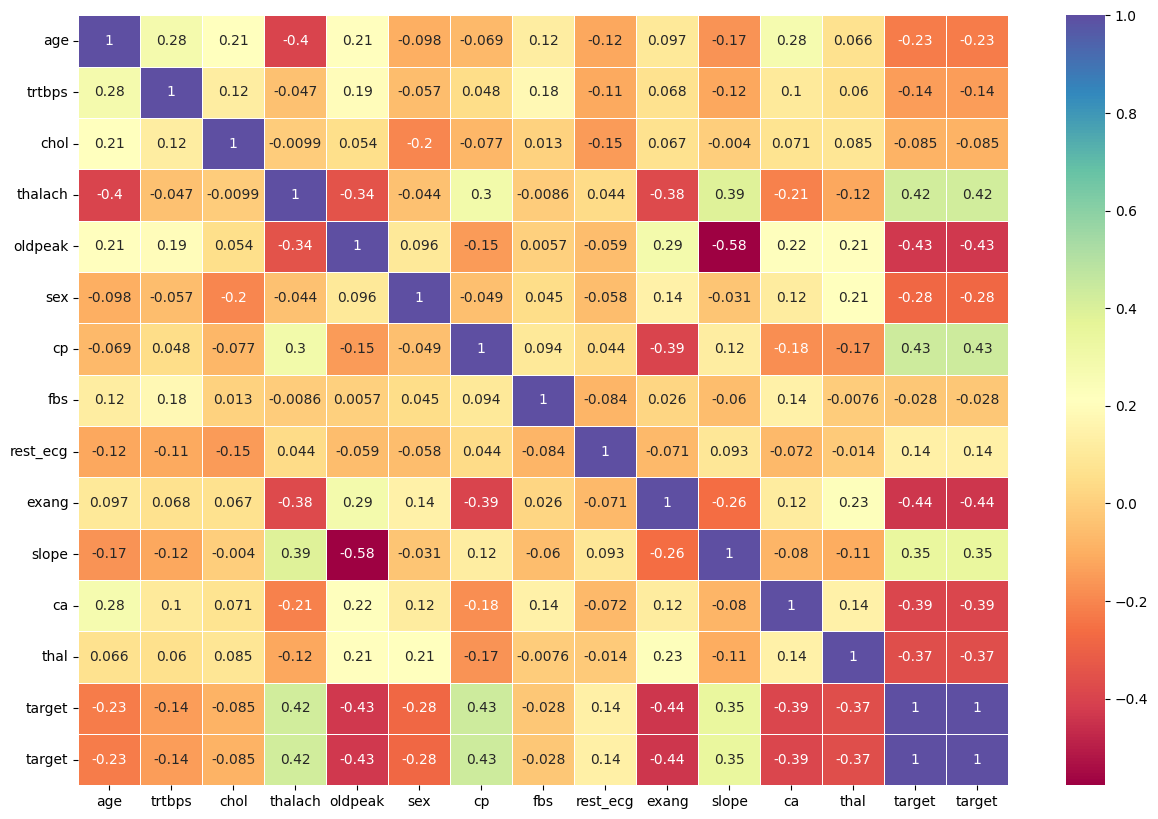

In [76]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_new2.corr(), cmap = "Spectral", annot = True, linewidth = 0.5)

##### * Negative numbers indicates negative correlation between the variables. Meaning there is inverse proportionality.
##### * Positive numbers indicates positive correlation between the variables. Meaning there is direct proportionality.


In [77]:
# Starting from the left to right, top to down
# The age variable has a highest correlation with the "thalach" variables with inverse proportionality

### 5. Preparing For Modeling <a id =33></a>

#### 5.1 Droping Columns with Low Correlation <a id =34></a>

In [78]:
df.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slope  \
0   63    1   3     145   233    1         0      150      0      2.3      0   
1   37    1   2     130   250    0         1      187      0      3.5      0   
2   41    0   1     130   204    0         0      172      0      1.4      2   
3   56    1   1     120   236    0         1      178      0      0.8      2   
4   57    0   0     120   354    0         1      163      1      0.6      2   

   ca  thal  target  
0   0   1.0       1  
1   0   2.0       1  
2   0   2.0       1  
3   0   2.0       1  
4   0   2.0       1

In [79]:
df.drop(["chol","fbs", "rest_ecg"], axis = 1, inplace =True)

In [80]:
df.head()

age  sex  cp  trtbps  thalach  exang  oldpeak  slope  ca  thal  target
0   63    1   3     145      150      0      2.3      0   0   1.0       1
1   37    1   2     130      187      0      3.5      0   0   2.0       1
2   41    0   1     130      172      0      1.4      2   0   2.0       1
3   56    1   1     120      178      0      0.8      2   0   2.0       1
4   57    0   0     120      163      1      0.6      2   0   2.0       1

####  5.2 Strugling Outliers <a id =35></a>

####  5.2.1 Visualizing Outliers <a id= 36></a>

##### We are gonna apply the boxplot to the numeric varaibles to determine the outliers one by one

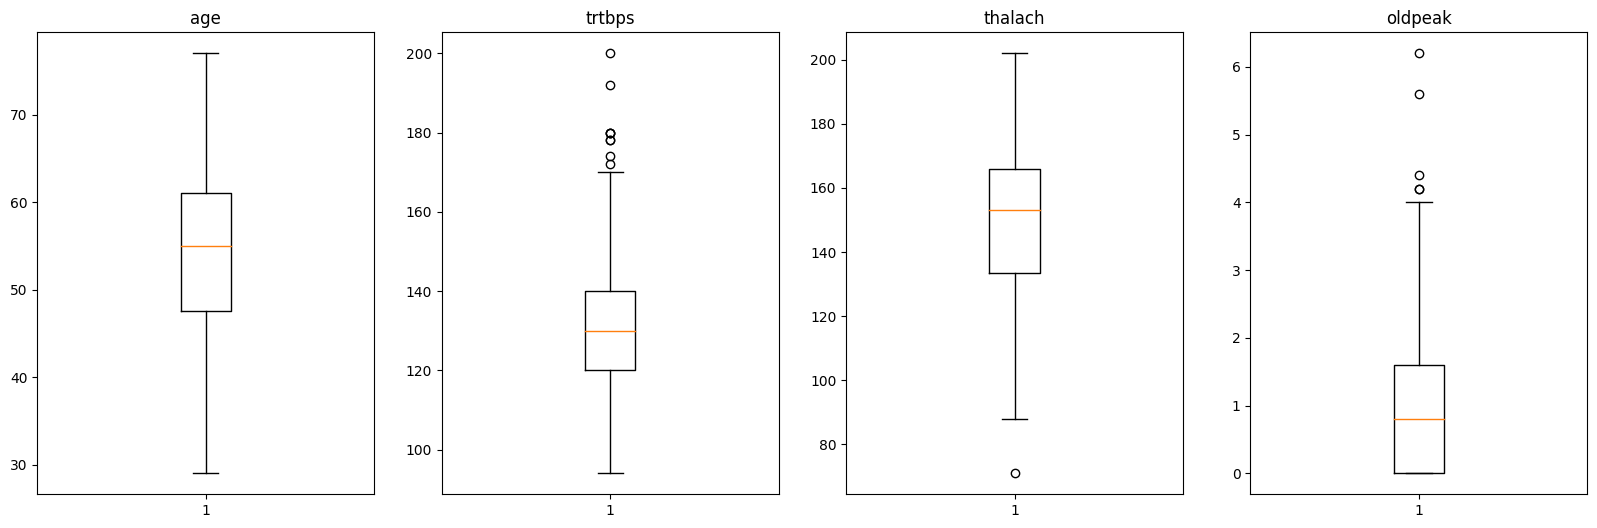

In [81]:
# Due to the hue parameter we couldn't fully analyze the outliers
# We gonna visualize them one by one
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,6))

# Visualization for the various numeric variables
ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

#####  1. <b>"oldpeak"</b>
 * "Oldpeak", from the bottom of the box
 * there's no lower wisker in the oldpeak variable.
 * The bottom of the box is at the level of the wisker.
 * The values are concentrated to the left.
 * There's a queue to the right. There's a right skew.
 * We see the outliers on the upper part of the wisker.
 * The values are 1.5*higher than the IQR value.

#### 2. <b>"thalach"</b>
*  There are very few outliers.
* Some closeness to the normal distribution.
* The box is shifted upwards, means data's slighly concentrated to the right.
* Slight skew.


#### 3. <b>"trtbps"</b>
* There are more outliers in the "trtbps".
* Image is very prone to the normal distribution.

#### 4. <b>"age"</b>
* There are no outliers.
* The box starts in the middle of the middle of the wiskers.

####  5.2.2 Dealing With Outliers <a id = 37></a>

#### * 5.2.2.1 <b>trtbps Variable</b><a id=38></a>

In [82]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

* <b>Z-Score Method:</b> The Z-score of a data point measures how many standard deviations it is away from the mean. Data points with a Z-score above a certain threshold (e.g., 3 or -3) are considered outliers.

In [83]:
# The variable under study is very close to the normal distribution but has Outliers


In [84]:
# Calculate all the observation of the variabled using the z-score method
z_score_trtbps = zscore(df["trtbps"])
for threshold in range(1,4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_score_trtbps>threshold)[0])))
    print("--------------------------")

Threshold Value: 1
Number of Outliers: 51
--------------------------
Threshold Value: 2
Number of Outliers: 13
--------------------------
Threshold Value: 3
Number of Outliers: 2
--------------------------


In [85]:
df[z_score_trtbps>2][["trtbps"]] # two squares to see the output as 

trtbps
8       172
101     178
110     180
152     170
195     170
203     180
223     200
228     170
241     174
248     192
260     178
266     180
292     170

* Dealing with the outliers
* What can we do with outliers? 
* 1. Delete the outliers --> Data deletion can affect validility of the data.
* 2. Value Assignment ---> Values can be representative statistics(mean, median, SD).
* 3. Limitation: --> can limit the outliers in the top and bottom of the box.
* Good for box with a lot of outliers.

In [86]:
# Lets determine the min. value
df[z_score_trtbps>2].trtbps.min()

170

In [87]:
# Let determine the largest value that is less than 170 in "trtbps". 
# The smallest value in the outlier but the highest value in the variable.
df[df["trtbps"]<170].trtbps.max()

165

In [88]:
# Using the winsorize method
# We will limit the value of the top of the variable to 165.
# Finding the ratio to limit the upperside
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"], 165))/100
print(winsorize_percentile_trtbps)

0.957095709570957


In [89]:
# Subtrace the ratio from 1
# Since we gonna use the ratio above to limmit the upper side, we'll need to subtract form 1.
1 - winsorize_percentile_trtbps

0.04290429042904298

In [90]:
# Using the winsorize function
# (0, 1 - winsorize_percentile_trtbps) --> percentage equivalent from the top to bottom.
# limitation from the top will be the value above (i.e (1 - winsorize_percentile_trtbps)).
trtbps_winsorize = winsorize(df.trtbps, (0, 1 - winsorize_percentile_trtbps))

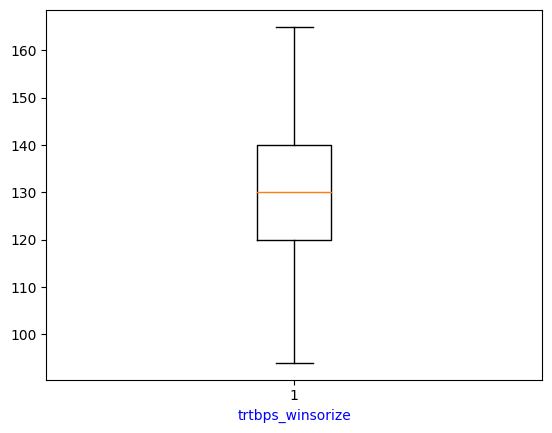

In [91]:
# Examine the variable again with boxplot.
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color ="b")
plt.show()

In [92]:
# Now there are no outliers in the new variable("trtbps").
# Add the new variable to the Dataset.
df["trtbps_winsorize"] = trtbps_winsorize

In [93]:
df.head()

age  sex  cp  trtbps  thalach  exang  oldpeak  slope  ca  thal  target  \
0   63    1   3     145      150      0      2.3      0   0   1.0       1   
1   37    1   2     130      187      0      3.5      0   0   2.0       1   
2   41    0   1     130      172      0      1.4      2   0   2.0       1   
3   56    1   1     120      178      0      0.8      2   0   2.0       1   
4   57    0   0     120      163      1      0.6      2   0   2.0       1   

   trtbps_winsorize  
0               145  
1               130  
2               130  
3               120  
4               120

####  5.2.2.2 <b>thalach Variable</b> <a id =39></a>

* The thalach has a left skew so we gonna use the interquatile range(IQR=75% - 25%) in the dataset. Or 1.5*25% and 1.5*75%

In [94]:
# Creating a fucntion to detect the outliers.
def iqr(df, var): # var ---> name of variable that will applt the interquatile range.
    q1 = np.quantile(df[var], 0.25) # 25% of the variable.
    q3 = np.quantile(df[var], 0.75) # 75% of the variable.
    diff = q3 - q1 # difference between them.
    lower_v = q1 - (1.5*diff)
    upper_v = q3 - (1.5*diff)
    return df[(df[var]< lower_v) | df[var]>upper_v]

In [95]:
# Applying the function to the thalach
thalach_out = iqr(df, "thalach")

In [96]:
thalach_out

Empty DataFrame
Columns: [age, sex, cp, trtbps, thalach, exang, oldpeak, slope, ca, thal, target, trtbps_winsorize]
Index: []

In [97]:
# thalach has an outlier at row 272.
# We going to drop it.
df.drop([272], axis = 0, inplace = True)

In [98]:
df["thalach"][270:275]

270    144
271    145
273    156
274    118
275    168
Name: thalach, dtype: int64

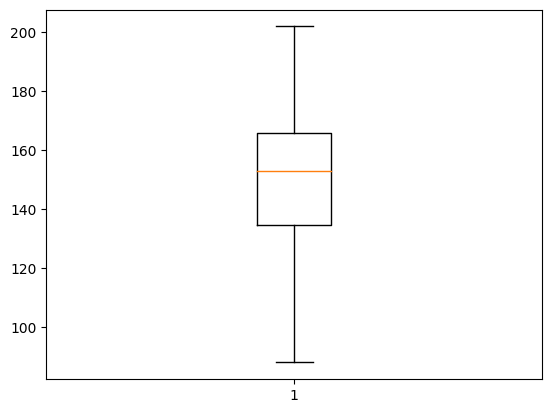

In [99]:
# checking the variable with boxplot
plt.boxplot(df["thalach"]);

####  5.2.2.3 <b>oldpeak Variable</b><a id = 40></a>

In [100]:
# Creating a fucntion to detect the outliers.
def iqr(df, var): # var ---> name of variable that will applt the interquatile range.
    q1 = np.quantile(df[var], 0.25) # 25% of the variable.
    q3 = np.quantile(df[var], 0.75) # 75% of the variable.
    diff = q3 - q1 # difference between them.
    lower_v = q1 - (1.5*diff)
    upper_v = q3 + (1.5*diff)
    return df[(df[var]< lower_v) | df[var]>upper_v]

In [101]:
oldpeak_out = iqr(df, "oldpeak")

In [102]:
oldpeak_out

Empty DataFrame
Columns: [age, sex, cp, trtbps, thalach, exang, oldpeak, slope, ca, thal, target, trtbps_winsorize]
Index: []

In [103]:
# The lowest value in the dataframe for the oldpeak is 4.2
df[df["oldpeak"]<4.2].oldpeak.max()

4.0

In [104]:
# Finding what percentile 4.0 fall into
winsorize_percentile_oldpeak = (stats.percentileofscore(df["oldpeak"], 4))/100
print(winsorize_percentile_oldpeak)

0.980132450331126


In [105]:
oldpeak_winsorize = winsorize(df.oldpeak, (0, (1-winsorize_percentile_oldpeak)))

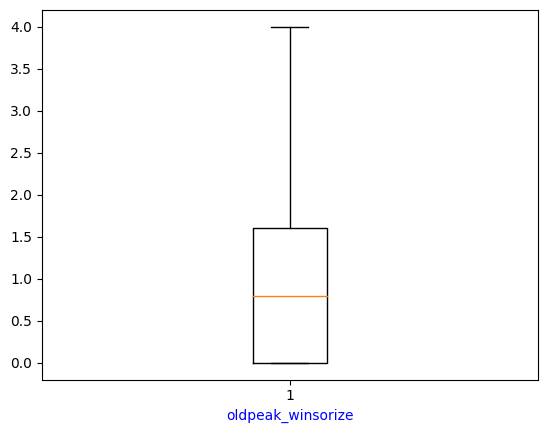

In [106]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize", color = "b")
plt.show()

In [107]:
df["oldpeak_winsorize"] = oldpeak_winsorize

In [108]:
df.head()

age  sex  cp  trtbps  thalach  exang  oldpeak  slope  ca  thal  target  \
0   63    1   3     145      150      0      2.3      0   0   1.0       1   
1   37    1   2     130      187      0      3.5      0   0   2.0       1   
2   41    0   1     130      172      0      1.4      2   0   2.0       1   
3   56    1   1     120      178      0      0.8      2   0   2.0       1   
4   57    0   0     120      163      1      0.6      2   0   2.0       1   

   trtbps_winsorize  oldpeak_winsorize  
0               145                2.3  
1               130                3.5  
2               130                1.4  
3               120                0.8  
4               120                0.6

In [109]:
# Now lets remove the old varibles from the dataaset.
df.drop(["trtbps","oldpeak"], axis =1, inplace = True)

In [110]:
df.head()

age  sex  cp  thalach  exang  slope  ca  thal  target  trtbps_winsorize  \
0   63    1   3      150      0      0   0   1.0       1               145   
1   37    1   2      187      0      0   0   2.0       1               130   
2   41    0   1      172      0      2   0   2.0       1               130   
3   56    1   1      178      0      2   0   2.0       1               120   
4   57    0   0      163      1      2   0   2.0       1               120   

   oldpeak_winsorize  
0                2.3  
1                3.5  
2                1.4  
3                0.8  
4                0.6

####  5.3 Determining Distributions of Numeric Variables <a id = 41></a>

In [111]:
# We gonna make some inference from the distribution in the data and approximate them for a normal distribution.
# We gonna check the distribution using histplot
df.head()

age  sex  cp  thalach  exang  slope  ca  thal  target  trtbps_winsorize  \
0   63    1   3      150      0      0   0   1.0       1               145   
1   37    1   2      187      0      0   0   2.0       1               130   
2   41    0   1      172      0      2   0   2.0       1               130   
3   56    1   1      178      0      2   0   2.0       1               120   
4   57    0   0      163      1      2   0   2.0       1               120   

   oldpeak_winsorize  
0                2.3  
1                3.5  
2                1.4  
3                0.8  
4                0.6

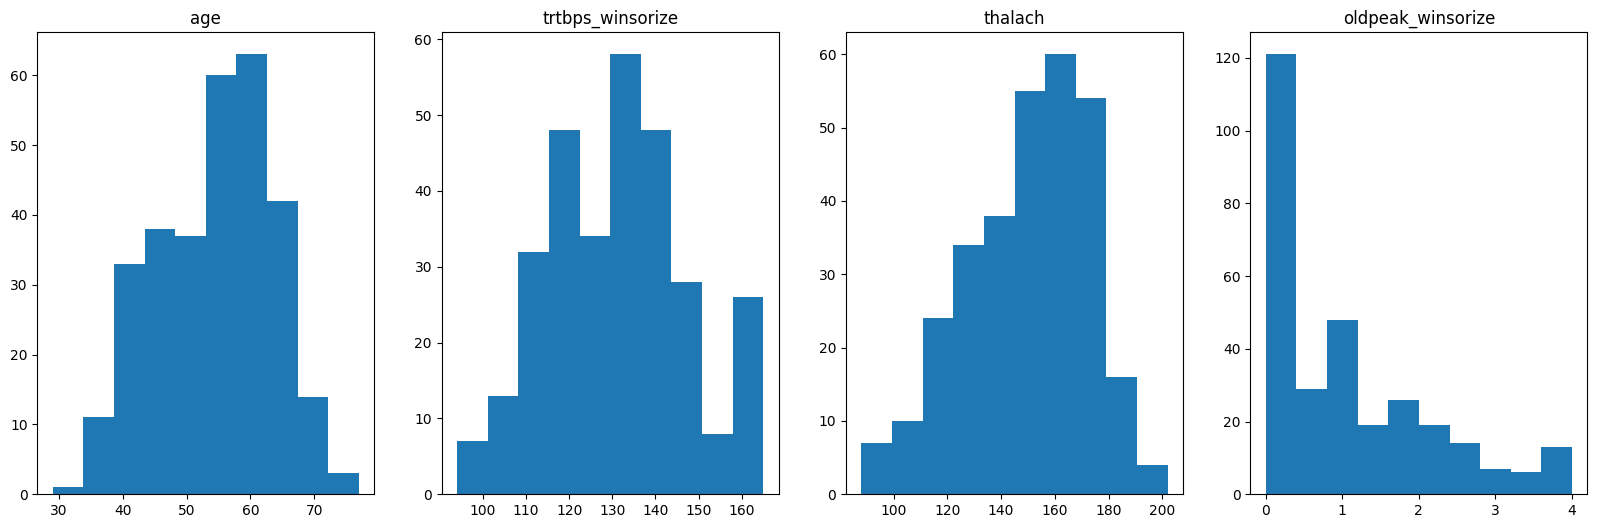

In [112]:
# We gonna visualize them one by one
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,6))

# Visualization for the various numeric variables
ax1.hist(df["age"])
ax1.set_title("age")

ax2.hist(df["trtbps_winsorize"])
ax2.set_title("trtbps_winsorize")

ax3.hist(df["thalach"])
ax3.set_title("thalach")

ax4.hist(df["oldpeak_winsorize"])
ax4.set_title("oldpeak_winsorize")

plt.show()

In [113]:
# Seeing the determination numerically
df[["age","trtbps_winsorize","thalach","oldpeak_winsorize"]].agg(["skew"]).transpose()

skew
age               -0.199209
trtbps_winsorize   0.251969
thalach           -0.461611
oldpeak_winsorize  0.996036

* The values are the skewness value of the numerical variables.
* Almost symmetrical distribution if its between -0.5 and 0.5.
* Moderate skew if it between -0.5 and +1.0
* Very skew distribution if its between -1.0 and 1.0.

#### 5.4 Transformation Operation on Unsymmetrical Data <a id =42></a>

* <b>Log Transformation:</b> The log transformation is effective for reducing right-skewness (positive skewness). It's particularly useful when the data spans several orders of magnitude. 

* <b>Square Root Transformation:</b> Similar to the log transformation, the square root transformation reduces right-skewness, especially for non-negative values. 


In [114]:
df.head()

age  sex  cp  thalach  exang  slope  ca  thal  target  trtbps_winsorize  \
0   63    1   3      150      0      0   0   1.0       1               145   
1   37    1   2      187      0      0   0   2.0       1               130   
2   41    0   1      172      0      2   0   2.0       1               130   
3   56    1   1      178      0      2   0   2.0       1               120   
4   57    0   0      163      1      2   0   2.0       1               120   

   oldpeak_winsorize  
0                2.3  
1                3.5  
2                1.4  
3                0.8  
4                0.6

In [115]:
df["oldpeak_winsorize_log"] = np.log(df["oldpeak_winsorize"])
df["oldpeak_winsorize_sqrt"] = np.sqrt(df["oldpeak_winsorize"])

In [116]:
df.head()

age  sex  cp  thalach  exang  slope  ca  thal  target  trtbps_winsorize  \
0   63    1   3      150      0      0   0   1.0       1               145   
1   37    1   2      187      0      0   0   2.0       1               130   
2   41    0   1      172      0      2   0   2.0       1               130   
3   56    1   1      178      0      2   0   2.0       1               120   
4   57    0   0      163      1      2   0   2.0       1               120   

   oldpeak_winsorize  oldpeak_winsorize_log  oldpeak_winsorize_sqrt  
0                2.3               0.832909                1.516575  
1                3.5               1.252763                1.870829  
2                1.4               0.336472                1.183216  
3                0.8              -0.223144                0.894427  
4                0.6              -0.510826                0.774597

In [117]:
df[["oldpeak_winsorize","oldpeak_winsorize_log","oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose()

skew
oldpeak_winsorize       0.996036
oldpeak_winsorize_log        NaN
oldpeak_winsorize_sqrt  0.108926

*  If there is an observation with a zero value in a variable, the log conversion value is given as NaN("null")
* Since the third variable in the log is symmetrical, we remove the other variables related to oldpeak.

In [118]:
# Remover the other variables related to oldpeak
df.drop(["oldpeak_winsorize","oldpeak_winsorize_log"], axis =1,inplace =True)

In [119]:
df.head()

age  sex  cp  thalach  exang  slope  ca  thal  target  trtbps_winsorize  \
0   63    1   3      150      0      0   0   1.0       1               145   
1   37    1   2      187      0      0   0   2.0       1               130   
2   41    0   1      172      0      2   0   2.0       1               130   
3   56    1   1      178      0      2   0   2.0       1               120   
4   57    0   0      163      1      2   0   2.0       1               120   

   oldpeak_winsorize_sqrt  
0                1.516575  
1                1.870829  
2                1.183216  
3                0.894427  
4                0.774597

#### 5.5 Applying One Hot Encoding Method to Categorical Variables <a id =43></a>

* We gonna operate on the categorical data.
* Since machine learning algorithm does not work on categorical variables, we gonna convert the categorical to a num. Data.
* We gonna use <b>One Hot Encoding</b> method.
* <b> One Hot Encoding</b> is a technique used in machine learning and data preprocessing to convert categorical variables into a numerical format that can be provided to machine learning algorithms. It's particularly useful when dealing with categorical variables that have no inherent ordinal relationship between their categories.
* We convert each of the observation values in the categorical variable to be a column in the dataset.
* It convert the value to a bianry system

In [120]:
# Let backup the dataframe first
df_copy = df.copy()
df_copy.head()

age  sex  cp  thalach  exang  slope  ca  thal  target  trtbps_winsorize  \
0   63    1   3      150      0      0   0   1.0       1               145   
1   37    1   2      187      0      0   0   2.0       1               130   
2   41    0   1      172      0      2   0   2.0       1               130   
3   56    1   1      178      0      2   0   2.0       1               120   
4   57    0   0      163      1      2   0   2.0       1               120   

   oldpeak_winsorize_sqrt  
0                1.516575  
1                1.870829  
2                1.183216  
3                0.894427  
4                0.774597

In [121]:
# Lets call the categorical variables

# Assuming categorical_var is your pandas Series or DataFrame column
categorical_var = pd.Series(categorical_var).drop_duplicates().tolist()
categorical_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [122]:
# Removing the columns we dont want to operate on
categorical_var.remove("fbs")
categorical_var.remove("rest_ecg")

In [123]:
categorical_var

['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [124]:
#  Lets now convert using the one hot encoding
df_copy = pd.get_dummies(df_copy, columns = categorical_var[:-1], drop_first =True) # Lets remove the target variable 

In [125]:
df_copy.head()

age  thalach  target  trtbps_winsorize  oldpeak_winsorize_sqrt  sex_1  \
0   63      150       1               145                1.516575   True   
1   37      187       1               130                1.870829   True   
2   41      172       1               130                1.183216  False   
3   56      178       1               120                0.894427   True   
4   57      163       1               120                0.774597  False   

    cp_1   cp_2   cp_3  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  \
0  False  False   True    False    False    False  False  False  False  False   
1  False   True  False    False    False    False  False  False  False  False   
2   True  False  False    False    False     True  False  False  False  False   
3   True  False  False    False    False     True  False  False  False  False   
4  False  False  False     True    False     True  False  False  False  False   

   thal_2.0  thal_3.0  
0     False     False  
1      True     False  
2      True     False  
3      True     False  
4      True     False

#### 5.6 Feature Scaling with the RobustScaler Method For Machine Learning Algorithms<a id =44></a>

In [126]:
new_numeric_var = ["age","thalach","trtbps_winsorize","oldpeak_winsorize_sqrt"]

In [127]:
robust_scaler = RobustScaler()

In [128]:
df_copy[new_numeric_var] = robust_scaler.fit_transform(df_copy[new_numeric_var])

In [129]:
df_copy.head()

age   thalach  target  trtbps_winsorize  oldpeak_winsorize_sqrt  \
0  0.581818 -0.095238       1              0.75                0.491851   
1 -1.309091  1.079365       1              0.00                0.771913   
2 -1.018182  0.603175       1              0.00                0.228308   
3  0.072727  0.793651       1             -0.50                0.000000   
4  0.145455  0.317460       1             -0.50               -0.094734   

   sex_1   cp_1   cp_2   cp_3  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3  \
0   True  False  False   True    False    False    False  False  False  False   
1   True  False   True  False    False    False    False  False  False  False   
2  False   True  False  False    False    False     True  False  False  False   
3   True   True  False  False    False    False     True  False  False  False   
4  False  False  False  False     True    False     True  False  False  False   

    ca_4  thal_2.0  thal_3.0  
0  False     False     False  
1  False      True     False  
2  False      True     False  
3  False      True     False  
4  False      True     False

In [130]:
df_copy.head()

age   thalach  target  trtbps_winsorize  oldpeak_winsorize_sqrt  \
0  0.581818 -0.095238       1              0.75                0.491851   
1 -1.309091  1.079365       1              0.00                0.771913   
2 -1.018182  0.603175       1              0.00                0.228308   
3  0.072727  0.793651       1             -0.50                0.000000   
4  0.145455  0.317460       1             -0.50               -0.094734   

   sex_1   cp_1   cp_2   cp_3  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3  \
0   True  False  False   True    False    False    False  False  False  False   
1   True  False   True  False    False    False    False  False  False  False   
2  False   True  False  False    False    False     True  False  False  False   
3   True   True  False  False    False    False     True  False  False  False   
4  False  False  False  False     True    False     True  False  False  False   

    ca_4  thal_2.0  thal_3.0  
0  False     False     False  
1  False      True     False  
2  False      True     False  
3  False      True     False  
4  False      True     False

#### 5.7 Separating Data into Test and Training set<a id =45></a>

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
x = df_copy.drop(["target"], axis =1)
y = df_copy[["target"]]

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.1, random_state = 3)

In [134]:
x_train.head()

age   thalach  trtbps_winsorize  oldpeak_winsorize_sqrt  sex_1  \
201  0.363636 -0.380952             -0.25                0.615769   True   
82   0.363636  0.222222             -1.40               -0.707107  False   
187 -0.072727 -1.396825             -0.30                0.465497   True   
259 -1.236364  0.920635             -0.50                0.833997   True   
5    0.145455 -0.158730              0.50               -0.207107   True   

      cp_1   cp_2   cp_3  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3  \
201  False  False  False     True     True    False   True  False  False   
82   False   True  False    False    False     True   True  False  False   
187  False  False  False     True     True    False   True  False  False   
259  False  False   True     True     True    False  False  False  False   
5    False  False  False    False     True    False  False  False  False   

      ca_4  thal_2.0  thal_3.0  
201  False     False      True  
82   False      True     False  
187  False     False      True  
259  False     False      True  
5    False     False     False

In [135]:
y_train.head()

target
201       0
82        1
187       0
259       0
5         1

In [136]:
print(f"x_train:{x_train.shape[0]}")
print(f"x_test:{x_test.shape[0]}")
print(f"y_train:{y_train.shape[0]}")
print(f"y_test:{y_test.shape[0]}")

x_train:271
x_test:31
y_train:271
y_test:31


####  6 Modelling<a id =46></a>

#### 6.1 Logistic Regression Algorithm<a id = 47></a>

* Used for cases where the dependent variable is categorical.

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [138]:
# Creating the logistic regression object
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [139]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [140]:
# Making a prediction using the test data for the x
y_pred = log_reg.predict(x_test)

In [141]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [142]:
#  Lets test the accuracy
accuracy = accuracy_score(y_test,y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8709677419354839


* How relaible is this accuracy?
* There's no underfitting for the model with 87% accuracy score.

#### 6.1.1 Cross Validation<a id = 48></a>

In [143]:
from sklearn.model_selection import cross_val_score

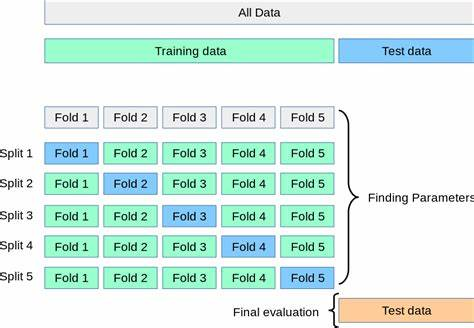

* The pic above show a 5-fold cross-validation.
* The purpose of this it to determine if the accuracy we calculated earlier is reliable or not.
* Hence we gonna perform 5 iteration on the train and test data and at each iteration, the percentage of the test is swapped with the train data.
* The process continues till the iteration is complete.

In [144]:
scores = cross_val_score(log_reg, x_test,y_test, cv = 10)
print("Cross-Validation Accuracy Score", scores.mean())

Cross-Validation Accuracy Score 0.8666666666666666


* Model accuracy is still 87%, meaning there's no overfitting and model will work well.

####  6.1.2 Roc Curve and Area Under Curve(AUC)<a id =49></a>

In [145]:
from sklearn.metrics import RocCurveDisplay

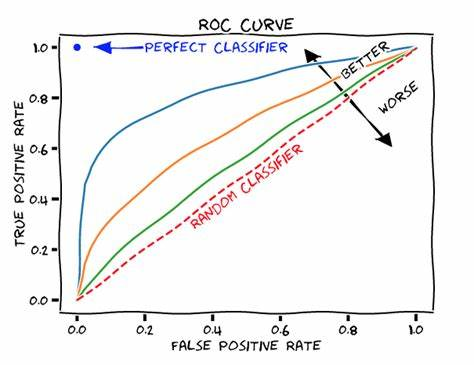

* The ROC curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) for different threshold values.
* The true positive rate (TPR), also known as sensitivity or recall, measures the proportion of actual positive cases that are correctly identified by the classifier.
* The false positive rate (FPR) measures the proportion of actual negative cases that are incorrectly identified as positive by the classifier.
* The ROC curve visualizes the classifier's performance across various threshold settings, showing how well it distinguishes between the two classes.
* A diagonal line (the line of no-discrimination) represents random guessing, while a curve closer to the top-left corner indicates better performance.

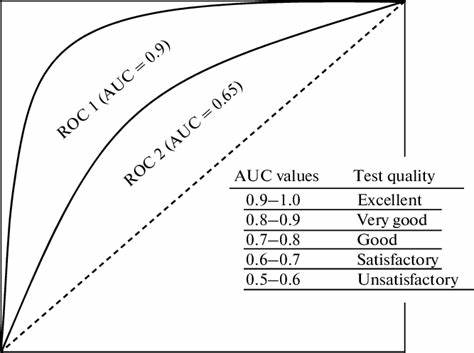

* AUC = 1: Perfect classifier (all positive cases ranked higher than negative cases).
* AUC = 0.5: Random classifier (no discrimination between positive and negative cases).
* AUC < 0.5: Classifier worse than random (positive cases ranked lower than negative cases).

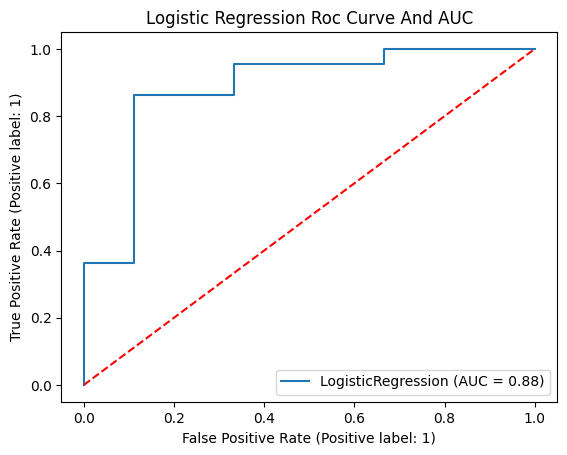

In [146]:
RocCurveDisplay.from_estimator(log_reg,x_test,y_test)
plt.title("Logistic Regression Roc Curve And AUC")
plt.plot([0, 1], [0,1], "r--")
plt.show()

#### Hyperparameter Optimization(with GridSearchCV<a id = 50></a>

In [147]:
from sklearn.model_selection import GridSearchCV

In [148]:
# logistic regression object
log_reg_new = LogisticRegression()
log_reg_new

LogisticRegression()

In [149]:
# Creating the parameters
parameters = {"penalty":["l1","l2"], "solver":["newton-cg","lbfgs","liblinear","sag","saga"]}

In [150]:
log_reg_grid = GridSearchCV(log_reg_new, param_grid =parameters)

In [151]:
log_reg_grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [152]:
print("Best Parameters",log_reg_grid.best_params_ )

Best Parameters {'penalty': 'l1', 'solver': 'saga'}


In [153]:
log_reg_new2 = LogisticRegression( penalty ="l1", solver = "saga")
log_reg_new2

LogisticRegression(penalty='l1', solver='saga')

In [154]:
log_reg_new2.fit(x_train,y_train)

LogisticRegression(penalty='l1', solver='saga')

In [155]:
y_pred = log_reg_new2.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [156]:
print("Test Accuracy score of Logistic Regression After Hyper_parameter tuning is: {}".format(accuracy_score(y_test,y_pred)))

Test Accuracy score of Logistic Regression After Hyper_parameter tuning is: 0.8709677419354839


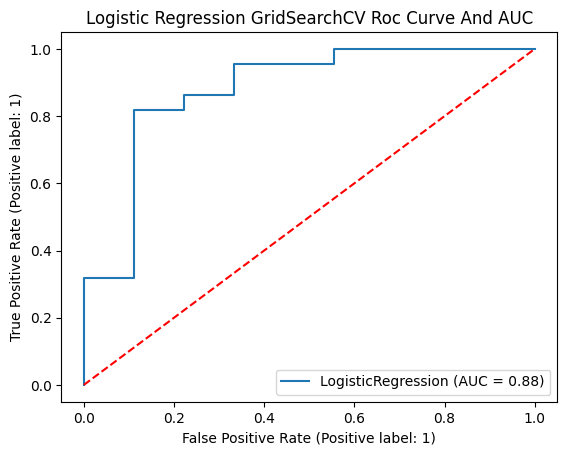

In [157]:
RocCurveDisplay.from_estimator(log_reg_new2,x_test,y_test)
plt.title("Logistic Regression GridSearchCV Roc Curve And AUC")
plt.plot([0, 1], [0,1], "r--")
plt.show()

#### We are going to set new model with different classification Algorithms

#### 6.2 Decision Tree Algorithm<a id =51></a>

In [158]:
from sklearn.tree import DecisionTreeClassifier

In [159]:
# Create the model object
dec_tree = DecisionTreeClassifier(random_state = 5)

In [160]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=5)

In [161]:
y_pred = dec_tree.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1])

In [162]:
# What percent of the paramter we guessed correctly
print("The test accuracy score of Decision Tree is: ", accuracy_score(y_test,y_pred))

The test accuracy score of Decision Tree is:  0.7419354838709677


In [163]:
# Checking the model accuracy using the cross validation
scores = cross_val_score(dec_tree, x_test,y_test, cv = 10)
print("cross-Validation Accuracy Score", scores.mean())

cross-Validation Accuracy Score 0.8333333333333333


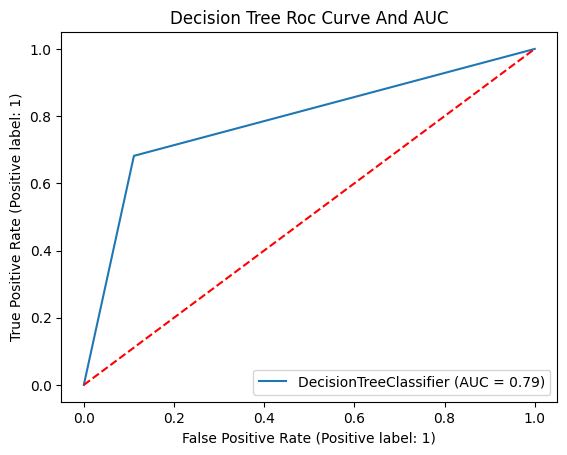

In [164]:
# Checking the Roc to find the AUC value
RocCurveDisplay.from_estimator(dec_tree,x_test,y_test)
plt.title("Decision Tree Roc Curve And AUC")
plt.plot([0, 1], [0,1], "r--")
plt.show()

#### 6.3 Support Vector Machine Algorithm<a id=52></a>

In [165]:
from sklearn.svm import SVC

In [166]:
svc_model = SVC(random_state = 5)

In [167]:
svc_model.fit(x_train,y_train)

SVC(random_state=5)

In [168]:
y_pred = svc_model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [169]:
print("The Accuracy score of SVM is:",accuracy_score(y_test, y_pred))

The Accuracy score of SVM is: 0.8709677419354839


In [170]:
# Checking the model accuracy using the cross validation
scores = cross_val_score(svc_model, x_test,y_test, cv = 10)
print("cross-Validation Accuracy Score", scores.mean())

cross-Validation Accuracy Score 0.8333333333333334


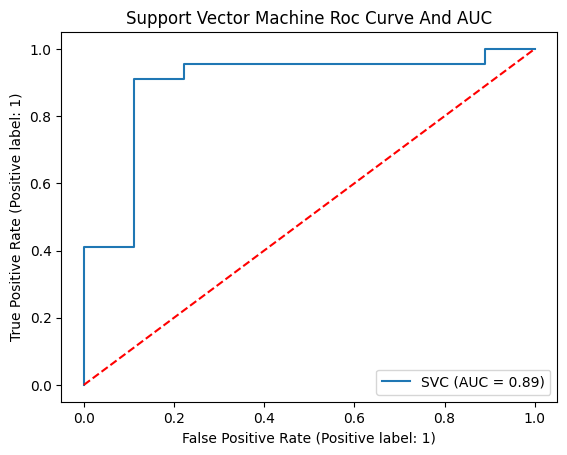

In [171]:
RocCurveDisplay.from_estimator(svc_model,x_test,y_test)
plt.title("Support Vector Machine Roc Curve And AUC")
plt.plot([0, 1], [0,1], "r--")
plt.show()

#### 6.4 Random Forest Algorithm<a id=53></a>

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
random_forest = RandomForestClassifier(random_state = 5)

In [174]:
random_forest.fit(x_train,y_train)

RandomForestClassifier(random_state=5)

In [175]:
y_pred = random_forest.predict(x_test)

In [176]:
print("The Accuracy score of Random Forest is:", accuracy_score(y_test,y_pred))

The Accuracy score of Random Forest is: 0.8387096774193549


In [177]:
# Checking the model accuracy using the cross validation
scores = cross_val_score(random_forest, x_test,y_test, cv = 10)
print("cross-Validation Accuracy Score", scores.mean())

cross-Validation Accuracy Score 0.8999999999999998


* The Random Forest Model has accuracy of about 90%.

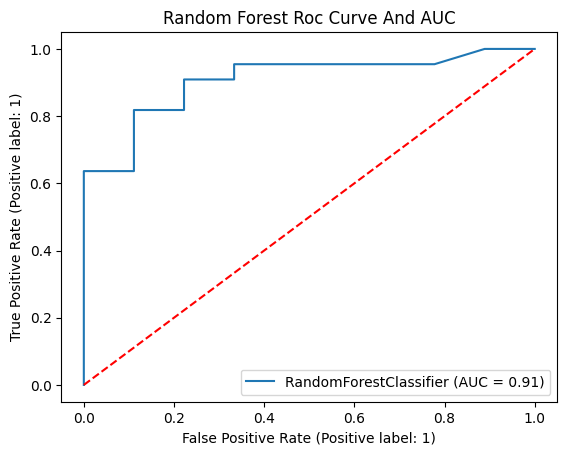

In [178]:
RocCurveDisplay.from_estimator(random_forest,x_test,y_test)
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0,1], "r--")
plt.show()

* Since the Model is better, we going to work on it and eliminate any under fitting.

#### 6.4.1 Hyper-parameter Optimization(with <b>GridSearchCV</b><a id = 54></a>

In [179]:
random_forest_new = RandomForestClassifier(random_state = 5)
random_forest_new

RandomForestClassifier(random_state=5)

In [180]:
parameters = { "n_estimators":[50,100,150,200],
               "criterion":["gini","entropy"],
               "max_features":["auto","sqrt","log2"],
               "bootstrap":[True,False]}

In [181]:
random_forest_grid = GridSearchCV(random_forest_new, param_grid = parameters)

* Lets create the model with the fit method.

In [182]:
random_forest_grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [183]:
# Over here lets print the best parameters for the model.
print("Best Parameters",random_forest_grid.best_params_)

Best Parameters {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 150}


In [184]:
random_forest_new2 = RandomForestClassifier(bootstrap =True, criterion = "entropy",max_features = "auto", n_estimators = 150, random_state = 5)

In [185]:
random_forest_new2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=150, random_state=5)

In [186]:
# lets make some guesses.
y_pred = random_forest_new2.predict(x_test)

In [187]:
print("The Test Accuracy Score of Random Forest after Hyperparameter tuning is:", accuracy_score(y_test,y_pred))

The Test Accuracy Score of Random Forest after Hyperparameter tuning is: 0.9032258064516129


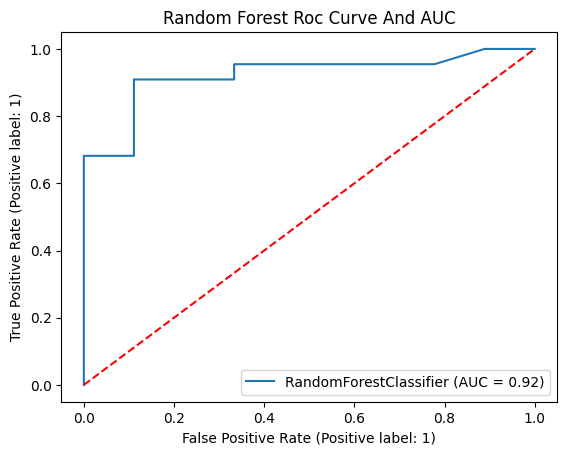

In [188]:
# Viewing model accuracy with the Roc graph
RocCurveDisplay.from_estimator(random_forest_new2,x_test,y_test)
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0,1], "r--")
plt.show()

* We now have a model with an AUC value of 92%.
* We are gonna choose this model.

#### 7. Project Conclusion<a id = 55></a>



1. <b>Data Preparation:</b> Initially, I prepared the dataset for <b>Exploratory Data Analysis (EDA)</b> within the project's scope.
2. <b>Exploratory Data Analysis (EDA):</b> Subsequently, I conducted an in-depth <b>Exploratory Data Analysis (EDA)</b>.
3. <b>Univariate Analysis:</b> I scrutinized both numerical and categorical variables through univariate analysis, utilizing graphical representations such as <b>Distplot</b> and <b>Pie Chart</b>.
4. <b>Bivariate Analysis:</b> Within the realm of bivariate analysis, I examined the relationships between variables using a range of graphical tools including <b>FacetGrid</b>, <b>Countplot</b>, <b>Pair Plot</b>, <b>Swarm Plot</b>, <b>Box Plot</b>, and <b>Heatmap</b>.
5. <b>Data Cleaning:</b> Ensuring the dataset's readiness for modeling involved addressing missing and outlier values.
6. <b>Model Implementation:</b> I employed four distinct algorithms during the modeling phase.
7. <b>Logistic Regression Model Performance:</b> The <b>Logistic Regression</b> model yielded an accuracy of <b>87%</b> and an AUC of <b>88%</b>.
8. <b>Decision Tree Model Performance:</b> The <b>Decision Tree</b> model achieved an accuracy of <b>83%</b> and an AUC of <b>85%</b>.
9. <b>Support Vector Classifier Model Performance:</b> With the <b>Support Vector Classifier</b> Model, I obtained an accuracy of <b>83%</b> and an AUC of <b>89%</b>.
10. <b>Random Forest Classifier Model Performance:</b> Remarkably, the <b>Random Forest Classifier</b> Model delivered an accuracy of <b>90.3%</b> and an AUC of <b>92%</b>.
11. <b>Model Selection:</b> Upon comprehensive evaluation of all model outputs, I elected to proceed with the <b>Random Forest Algorithm</b> due to its superior performance, yielding the most favorable results.